In [1]:
"""
- correct participant grouping
- no DWT utilization for artifact removal
- no rolling window
- (band power of participants x channels)
- five participants per group
-   The jupyter script is used to carry out the analysis of group runs
-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
-   The average of all scans in music therapy group and control group was used to develop the spectograms
-   Statistical analysis:   no rolling wondow applied as only participant scans were used
                            therefore, we have 6 music therapy scans and 5 control scans
"""

'\n- correct participant grouping\n- no DWT utilization for artifact removal\n- no rolling window\n- (band power of participants x channels)\n- five participants per group\n-   The jupyter script is used to carry out the analysis of group runs\n-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)\n-   The average of all scans in music therapy group and control group was used to develop the spectograms\n-   Statistical analysis:   no rolling wondow applied as only participant scans were used\n                            therefore, we have 6 music therapy scans and 5 control scans\n'

In [2]:
from helper import*
from params import brainwaves,fs,fs_setting,collection_time,wavelet,line,lowcut,highcut,order,nfft,noverlap,win,studygroups,Q,plotTitles,figSize,pltColor

In [3]:
M = [["MH_01_ES1_task1.zip","MH_02_ES1_task1.zip","MH_04_ES1_task1.zip","MH_07_ES1_task1.zip","MH_09_ES1_task1.zip"],
        ["MH_01_ES1_task2.zip","MH_02_ES1_task2.zip","MH_04_ES1_task2.zip","MH_07_ES1_task2.zip","MH_09_ES1_task2.zip"],
        ["MH_01_ES1_task3.zip","MH_02_ES1_task3.zip","MH_04_ES1_task3.zip","MH_07_ES1_task3.zip","MH_09_ES1_task3.zip"],
        ["MH_01_ES2_task1.zip","MH_02_ES2_task1.zip","MH_04_ES2_task1.zip","MH_07_ES2_task1.zip","MH_09_ES2_task1.zip"],
        ["MH_01_ES2_task2.zip","MH_02_ES2_task2.zip","MH_04_ES2_task2.zip","MH_07_ES2_task2.zip","MH_09_ES2_task2.zip"],
        ["MH_01_ES2_task3.zip","MH_02_ES2_task3.zip","MH_04_ES2_task3.zip","MH_07_ES2_task3.zip","MH_09_ES2_task3.zip"]]
C = [["MH_03_ES1_task1.zip","MH_06_ES1_task1.zip","MH_13_ES1_task1.zip","MH_14_ES1_task1.zip","MH_15_ES1_task1.zip"],
        ["MH_03_ES1_task2.zip","MH_06_ES1_task2.zip","MH_13_ES1_task2.zip","MH_14_ES1_task2.zip","MH_15_ES1_task2.zip"],
        ["MH_03_ES1_task3.zip","MH_06_ES1_task3.zip","MH_13_ES1_task3.zip","MH_14_ES1_task3.zip","MH_15_ES1_task3.zip"],
        ["MH_03_ES2_task1.zip","MH_06_ES2_task1.zip","MH_13_ES2_task1.zip","MH_14_ES2_task1.zip","MH_15_ES2_task1.zip"],
        ["MH_03_ES2_task2.zip","MH_06_ES2_task2.zip","MH_13_ES2_task2.zip","MH_14_ES2_task2.zip","MH_15_ES2_task2.zip"],
        ["MH_03_ES2_task3.zip","MH_06_ES2_task3.zip","MH_13_ES2_task3.zip","MH_14_ES2_task3.zip","MH_15_ES2_task3.zip"]]


In [4]:
from zipfile import ZipFile
from os import walk

def zipExtract(filenames,localDirectory,destDirectory,variableName,sFreq,data_collection_time,sampling_state):
    print("\n")
    print("zip files in "+ variableName+":")
    def zipExt(filename,localDirectory,destDirectory,variableName):
        zf = ZipFile(localDirectory+filename, 'r')
        path = destDirectory+variableName
        zf.extractall(path)
        zf.close()
    zipOutputs = []
    for filename in filenames:
        zipOutputs.append(zipExt(filename,localDirectory,destDirectory,variableName))
        print(filename)
    files_dest = next(walk(destDirectory+variableName), (None, None, []))[2]
    files_dest = [f for f in files_dest if f.endswith('.csv')]
    resampled_data = []
    resampled_time = []
    for I in range(len(files_dest)):
        resampled_data.append(singleTransformToRawEEG((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']],sFreq,data_collection_time,sampling_state)[0])
        resampled_time.append(singleTransformToRawEEG((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']],sFreq,data_collection_time,sampling_state)[1])
    resampled_data = np.array(resampled_data)
    resampled_time = np.array(resampled_time)
    print("\n")
    print(variableName + " zip files contents:")
    print(files_dest)
    return files_dest,resampled_data,resampled_time


localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
MT11 = zipExtract(M[0],localDir,destDir,"M11",fs,collection_time,fs_setting)[1]
MT12 = zipExtract(M[1],localDir,destDir,"M12",fs,collection_time,fs_setting)[1]
MT13 = zipExtract(M[2],localDir,destDir,"M13",fs,collection_time,fs_setting)[1]
MT21 = zipExtract(M[3],localDir,destDir,"M21",fs,collection_time,fs_setting)[1]
MT22 = zipExtract(M[4],localDir,destDir,"M22",fs,collection_time,fs_setting)[1]
MT23 = zipExtract(M[5],localDir,destDir,"M23",fs,collection_time,fs_setting)[1]
CT11 = zipExtract(C[0],localDir,destDir,"C11",fs,collection_time,fs_setting)[1]
CT12 = zipExtract(C[1],localDir,destDir,"C12",fs,collection_time,fs_setting)[1]
CT13 = zipExtract(C[2],localDir,destDir,"C13",fs,collection_time,fs_setting)[1]
CT21 = zipExtract(C[3],localDir,destDir,"C21",fs,collection_time,fs_setting)[1]
CT22 = zipExtract(C[4],localDir,destDir,"C22",fs,collection_time,fs_setting)[1]
CT23 = zipExtract(C[5],localDir,destDir,"C23",fs,collection_time,fs_setting)[1]
time_s = zipExtract(M[0],localDir,destDir,"M11",fs,collection_time,fs_setting)[2][0]
time_s = time_s.reshape(len(time_s),1)



zip files in M11:
MH_01_ES1_task1.zip
MH_02_ES1_task1.zip
MH_04_ES1_task1.zip
MH_07_ES1_task1.zip
MH_09_ES1_task1.zip


M11 zip files contents:
['mindMonitor_2021-06-03--15-34-12.csv', 'mindMonitor_2021-06-11--13-23-14.csv', 'mindMonitor_2021-10-11--16-00-43.csv', 'mindMonitor_2021-10-16--14-24-20.csv', 'mindMonitor_2021-10-08--13-24-55.csv']


zip files in M12:
MH_01_ES1_task2.zip
MH_02_ES1_task2.zip
MH_04_ES1_task2.zip
MH_07_ES1_task2.zip
MH_09_ES1_task2.zip


M12 zip files contents:
['mindMonitor_2021-10-08--13-30-38.csv', 'mindMonitor_2021-06-11--13-28-50.csv', 'mindMonitor_2021-10-16--14-27-42.csv', 'mindMonitor_2021-10-11--16-04-11.csv', 'mindMonitor_2021-06-03--15-37-00.csv']


zip files in M13:
MH_01_ES1_task3.zip
MH_02_ES1_task3.zip
MH_04_ES1_task3.zip
MH_07_ES1_task3.zip
MH_09_ES1_task3.zip


M13 zip files contents:
['mindMonitor_2021-10-08--13-33-55.csv', 'mindMonitor_2021-06-03--15-39-33.csv', 'mindMonitor_2021-10-11--16-06-53.csv', 'mindMonitor_2021-10-16--14-30-30.csv',

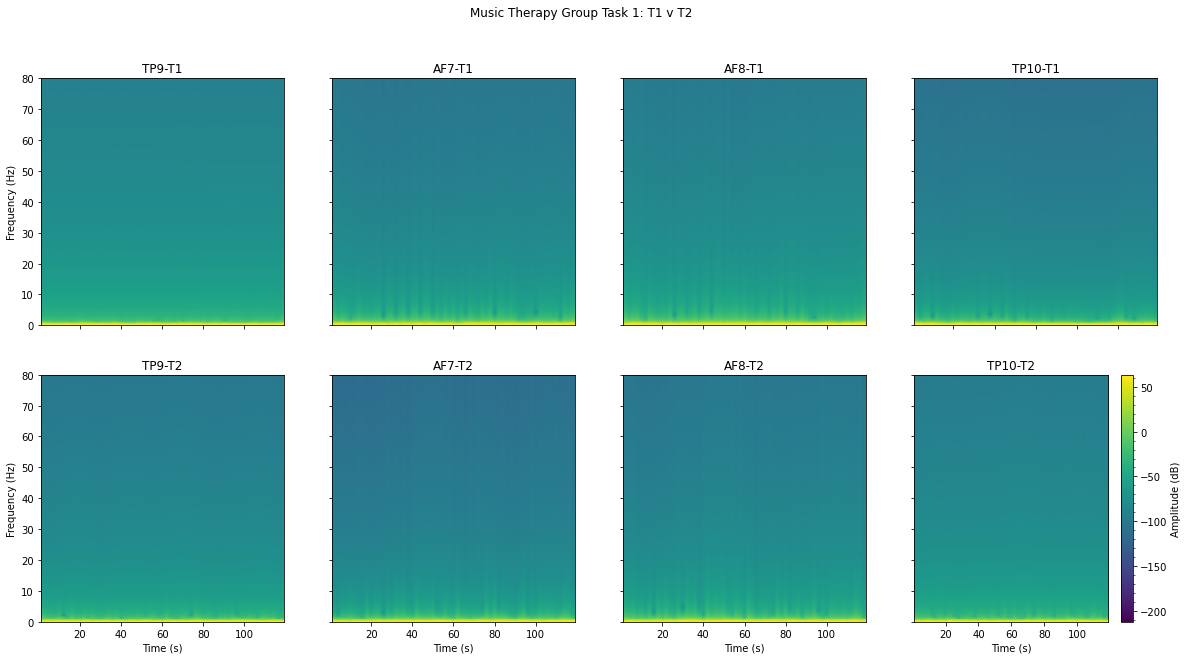

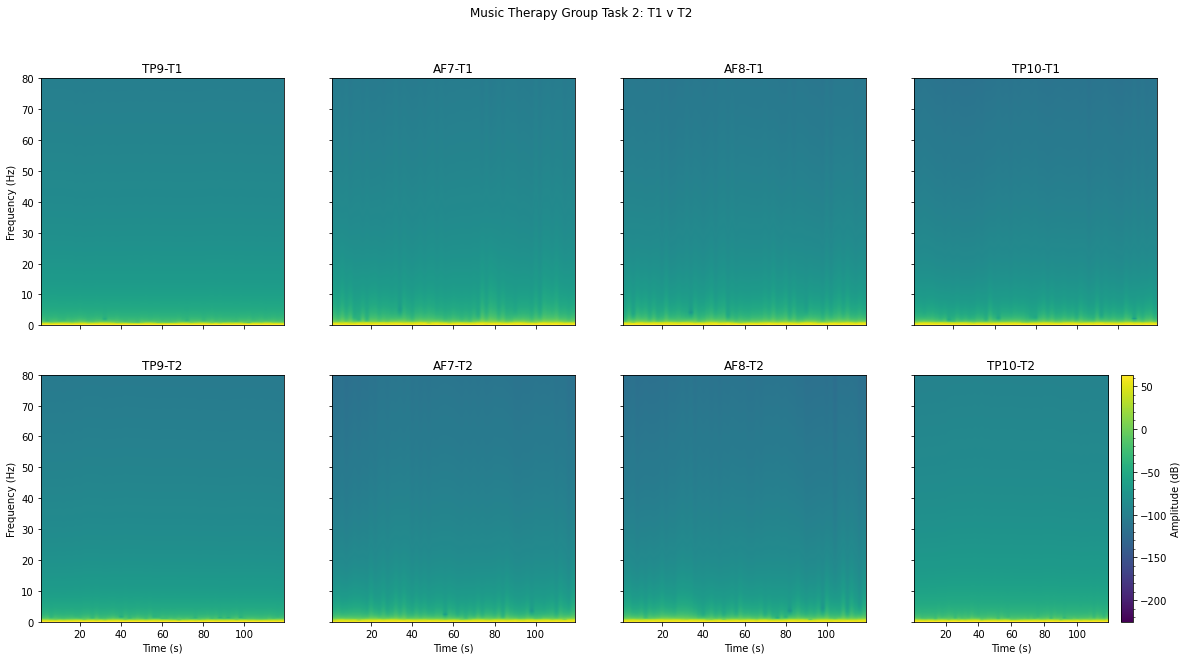

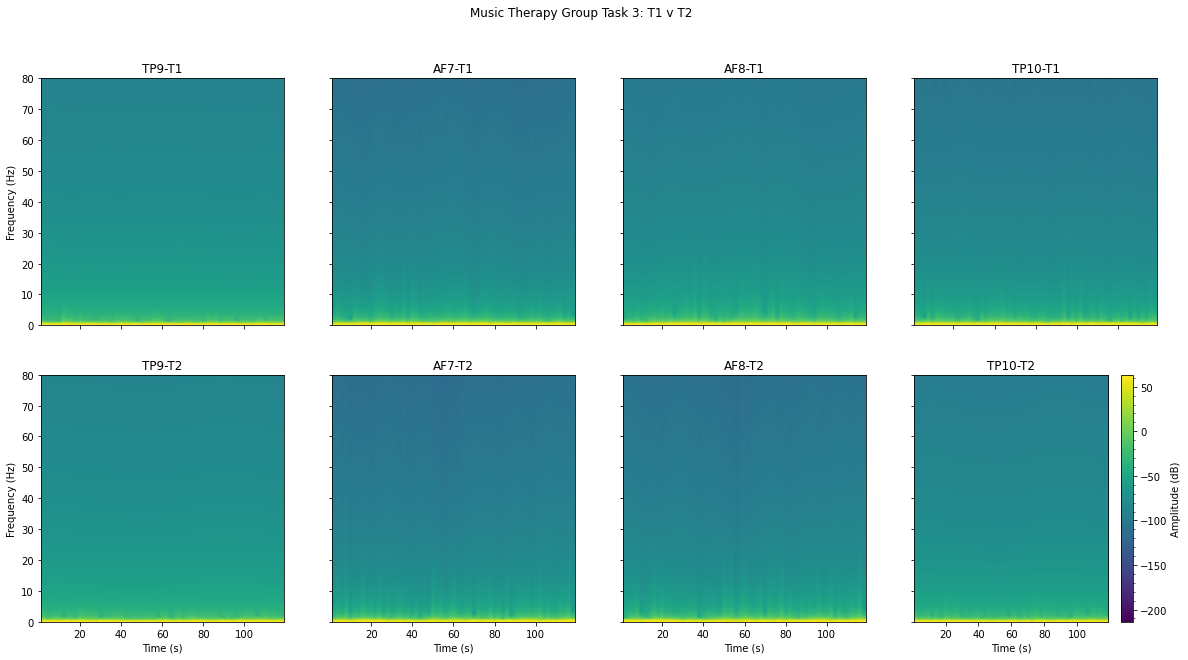

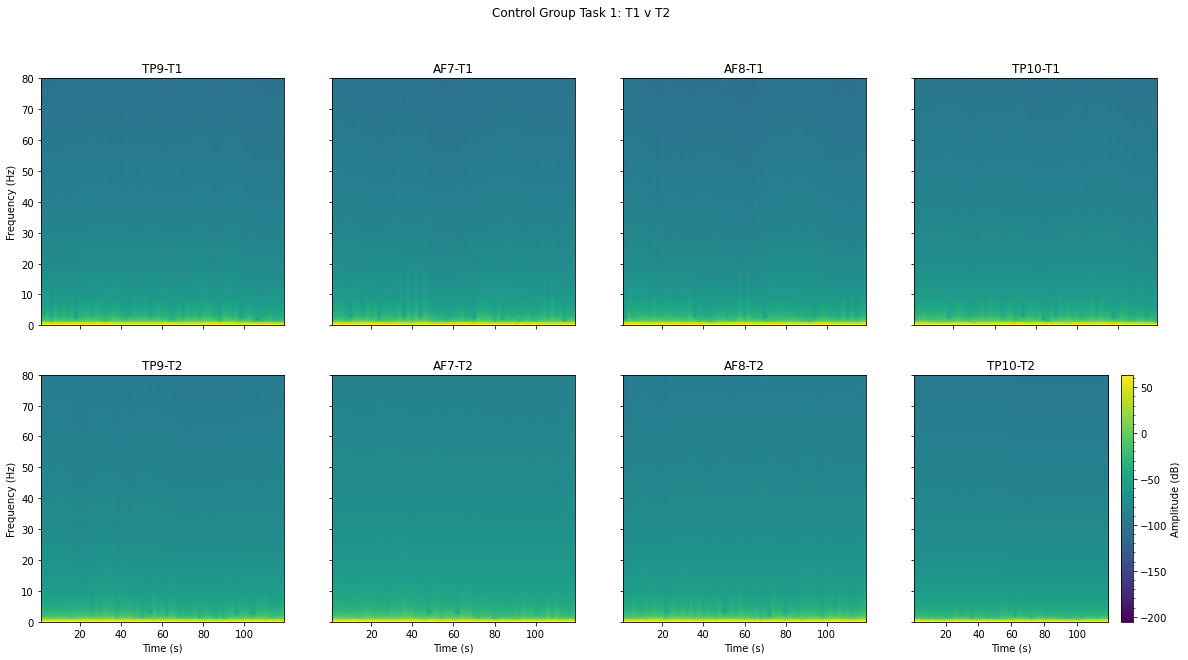

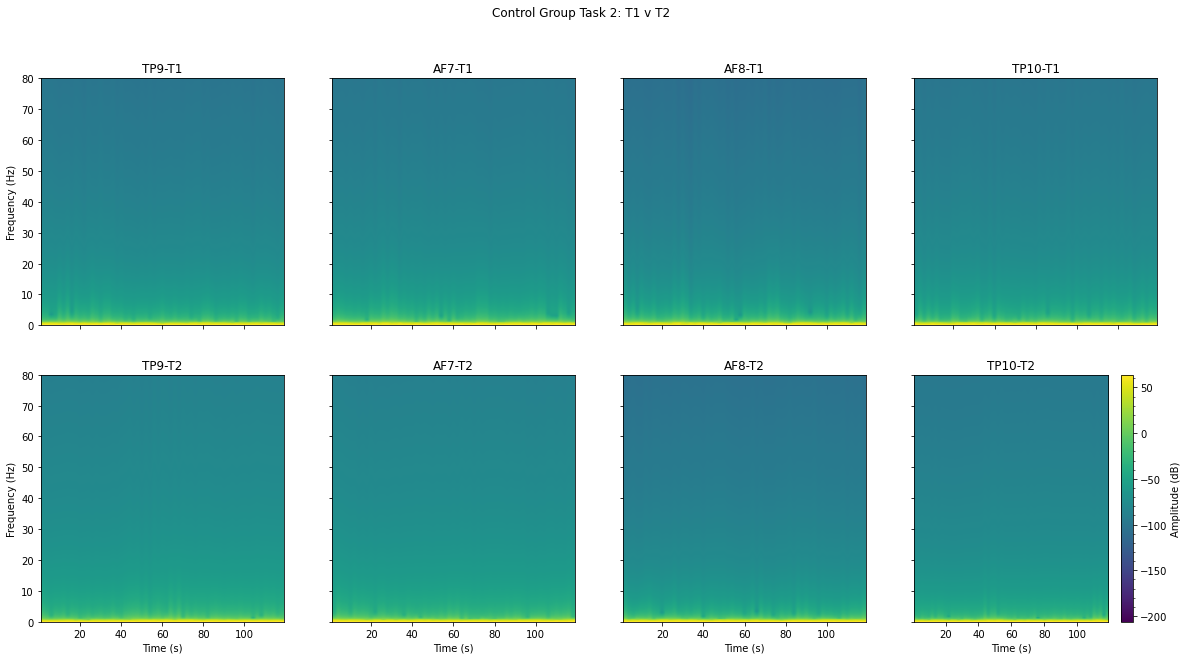

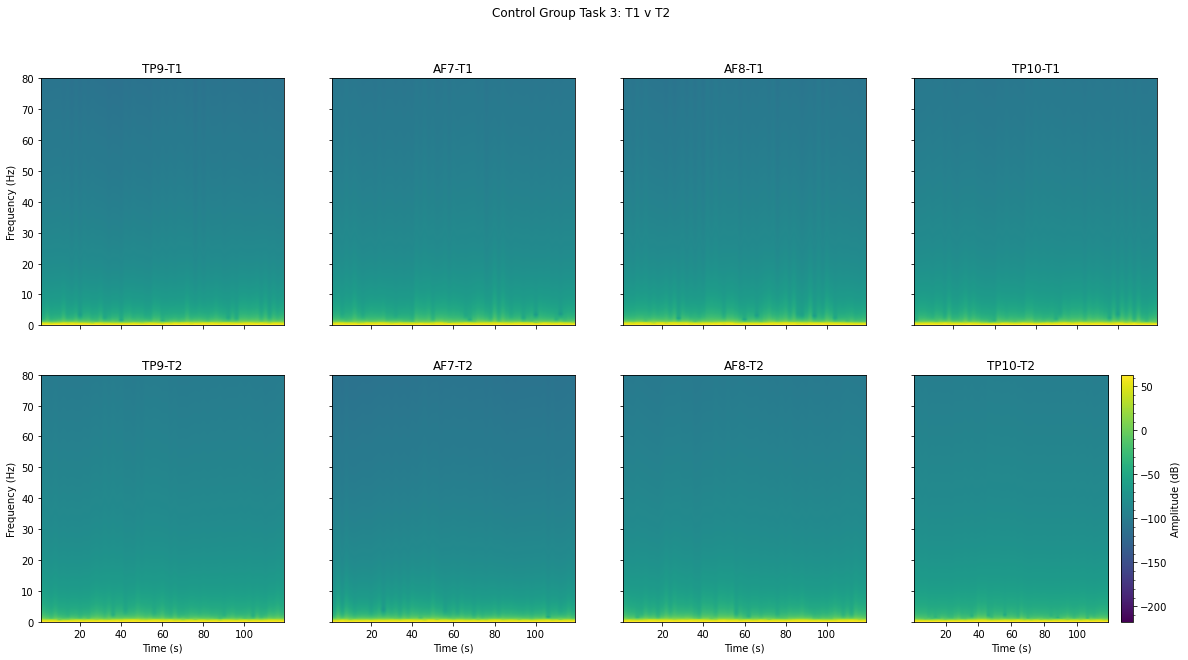

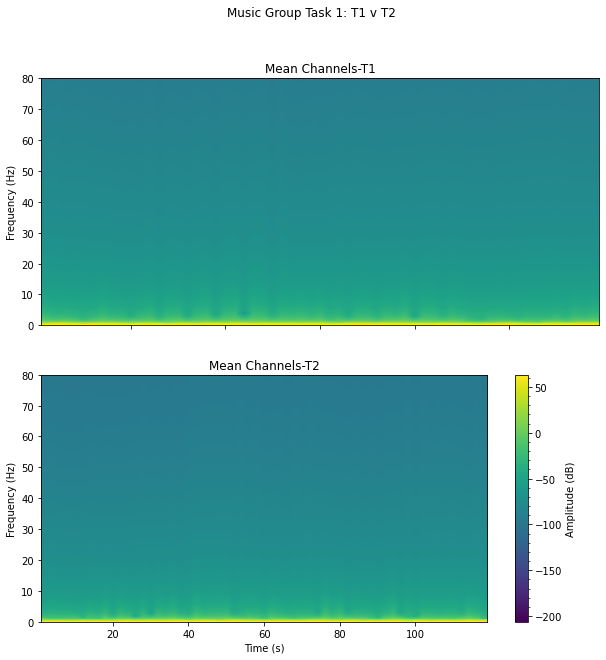

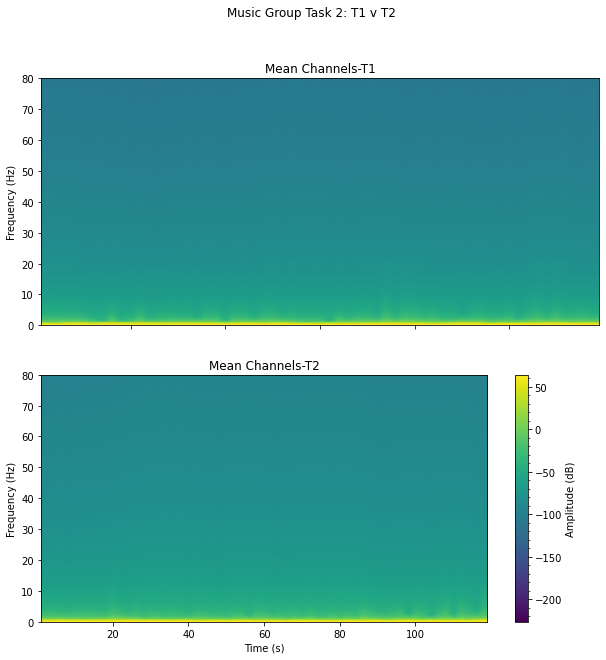

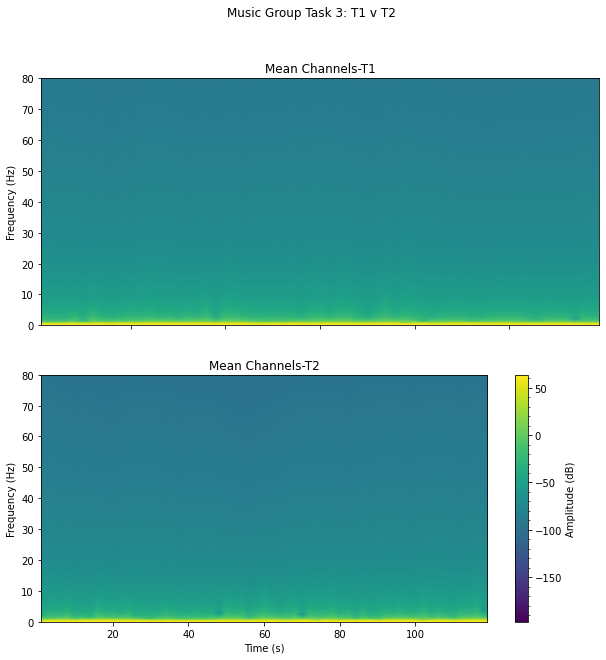

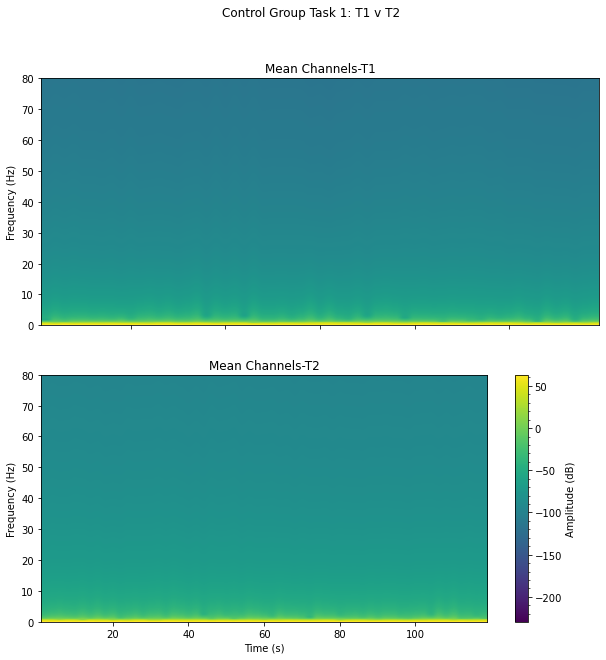

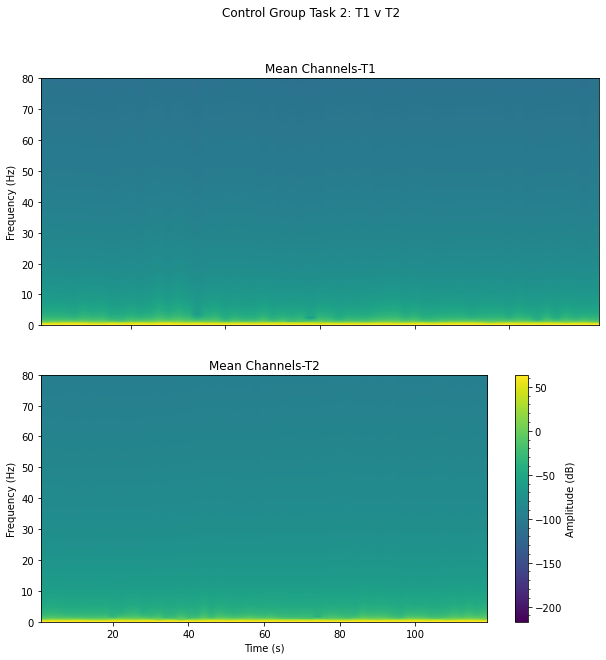

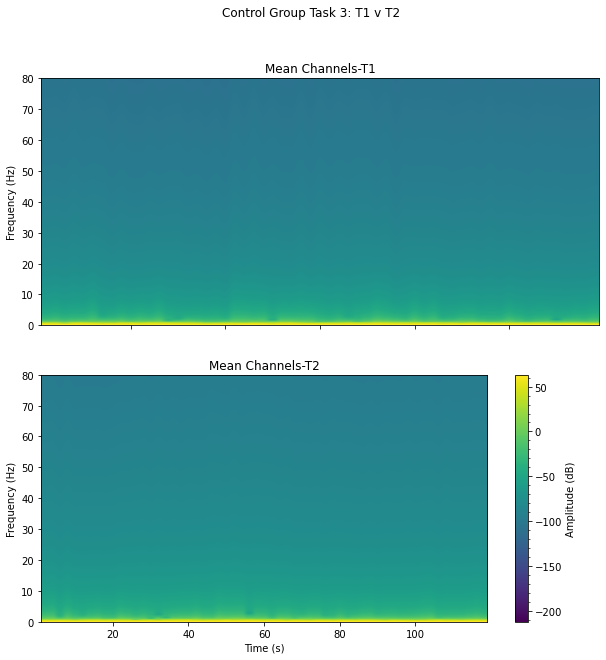

In [5]:
amp_MT11 = np.mean(MT11,axis=0)
amp_MT12 = np.mean(MT12,axis=0)
amp_MT13 = np.mean(MT13,axis=0)
amp_MT21 = np.mean(MT21,axis=0)
amp_MT22 = np.mean(MT22,axis=0)
amp_MT23 = np.mean(MT23,axis=0)
amp_CT11 = np.mean(CT11,axis=0)
amp_CT12 = np.mean(CT12,axis=0)
amp_CT13 = np.mean(CT13,axis=0)
amp_CT21 = np.mean(CT21,axis=0)
amp_CT22 = np.mean(CT22,axis=0)
amp_CT23 = np.mean(CT23,axis=0)
amp_mean_MT11 = np.mean(amp_MT11,axis=1)
amp_mean_MT11 = amp_mean_MT11.reshape(len(amp_mean_MT11),1)
amp_mean_MT12 = np.mean(amp_MT12,axis=1)
amp_mean_MT12 = amp_mean_MT12.reshape(len(amp_mean_MT12),1)
amp_mean_MT13 = np.mean(amp_MT13,axis=1)
amp_mean_MT13 = amp_mean_MT13.reshape(len(amp_mean_MT13),1)
amp_mean_MT21 = np.mean(amp_MT21,axis=1)
amp_mean_MT21 = amp_mean_MT21.reshape(len(amp_mean_MT21),1)
amp_mean_MT22 = np.mean(amp_MT22,axis=1)
amp_mean_MT22 = amp_mean_MT22.reshape(len(amp_mean_MT22),1)
amp_mean_MT23 = np.mean(amp_MT23,axis=1)
amp_mean_MT23 = amp_mean_MT23.reshape(len(amp_mean_MT23),1)
amp_mean_CT11 = np.mean(amp_CT11,axis=1)
amp_mean_CT11 = amp_mean_CT11.reshape(len(amp_mean_CT11),1)
amp_mean_CT12 = np.mean(amp_CT12,axis=1)
amp_mean_CT12 = amp_mean_CT12.reshape(len(amp_mean_CT12),1)
amp_mean_CT13 = np.mean(amp_CT13,axis=1)
amp_mean_CT13 = amp_mean_CT13.reshape(len(amp_mean_CT13),1)
amp_mean_CT21 = np.mean(amp_CT21,axis=1)
amp_mean_CT21 = amp_mean_CT21.reshape(len(amp_mean_CT21),1)
amp_mean_CT22 = np.mean(amp_CT22,axis=1)
amp_mean_CT22 = amp_mean_CT22.reshape(len(amp_mean_CT22),1)
amp_mean_CT23 = np.mean(amp_CT23,axis=1)
amp_mean_CT23 = amp_mean_CT23.reshape(len(amp_mean_CT23),1)

spectogramPlot((np.hstack((amp_MT11,amp_MT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_MT12,amp_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_MT13,amp_MT23))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 3: T1 v T2')
spectogramPlot((np.hstack((amp_CT11,amp_CT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_CT12,amp_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_CT13,amp_CT23))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 3: T1 v T2')
spectogramPlot((np.hstack((amp_mean_MT11,amp_mean_MT21))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_mean_MT12,amp_mean_MT22))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_mean_MT13,amp_mean_MT23))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 3: T1 v T2')
spectogramPlot((np.hstack((amp_mean_CT11,amp_mean_CT21))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_mean_CT12,amp_mean_CT22))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_mean_CT13,amp_mean_CT23))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 3: T1 v T2')



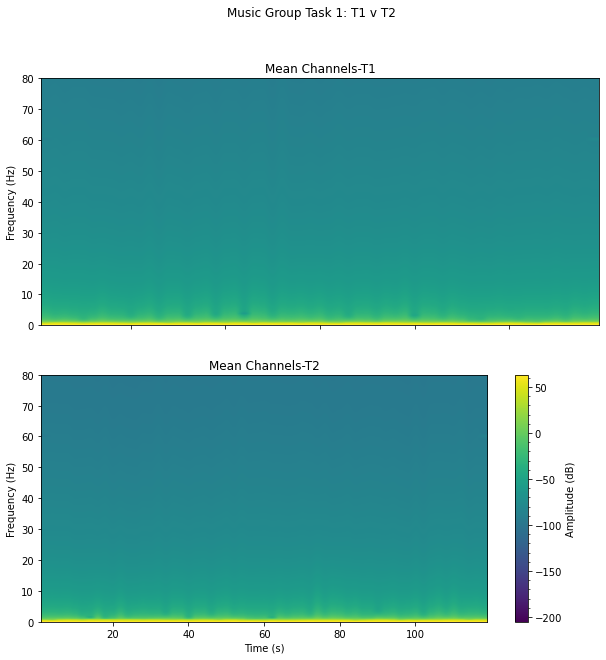

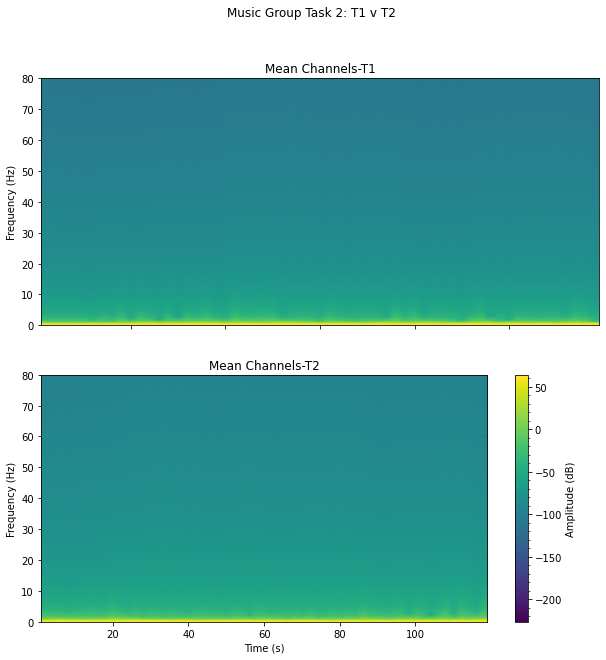

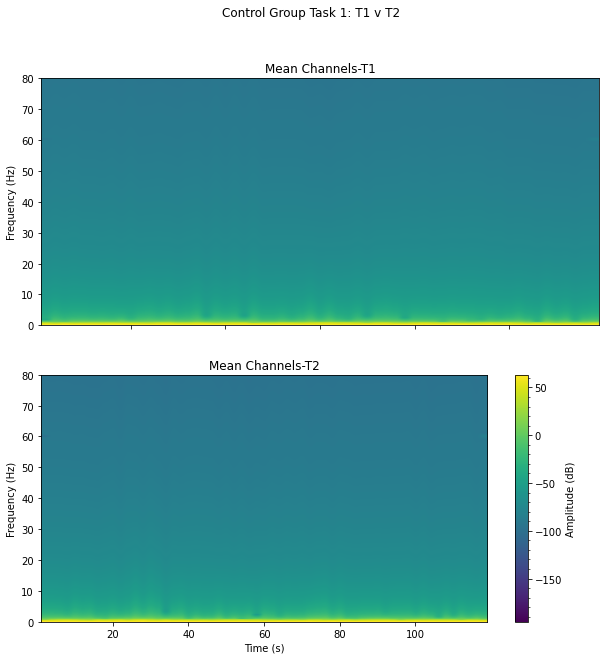

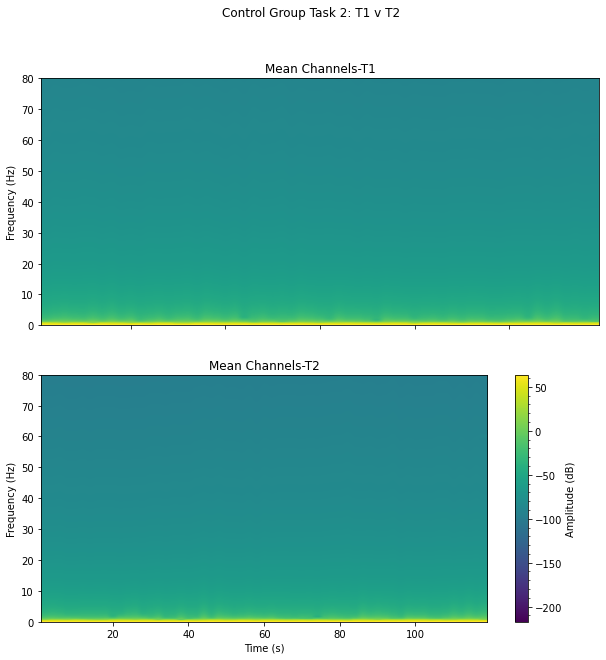

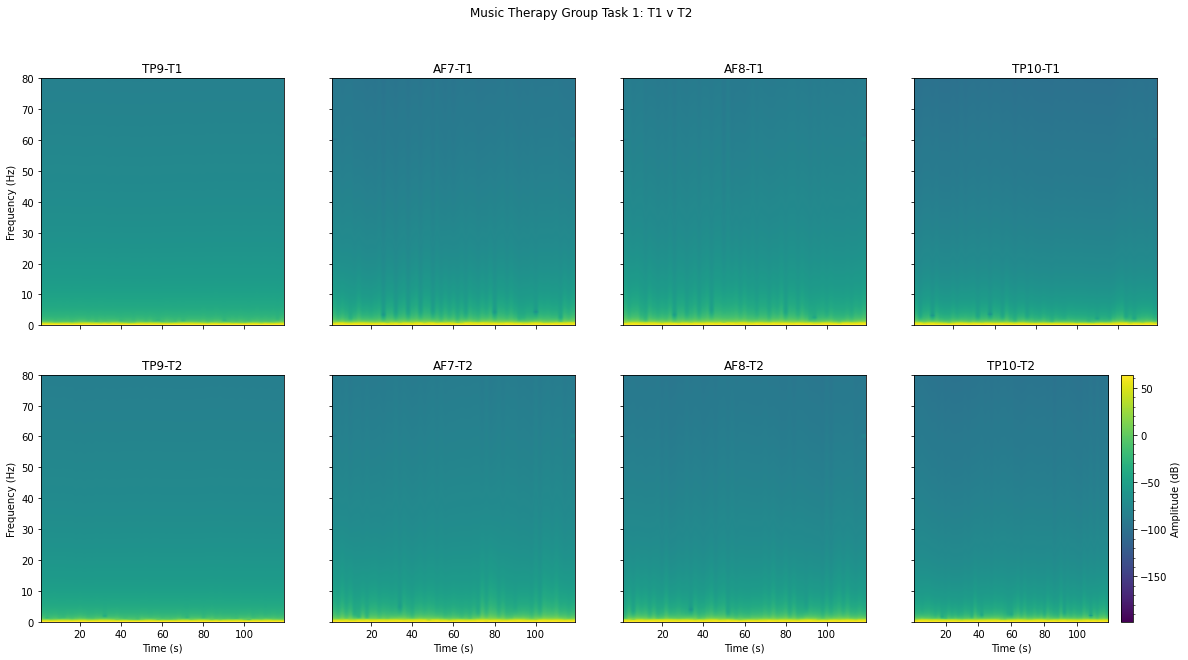

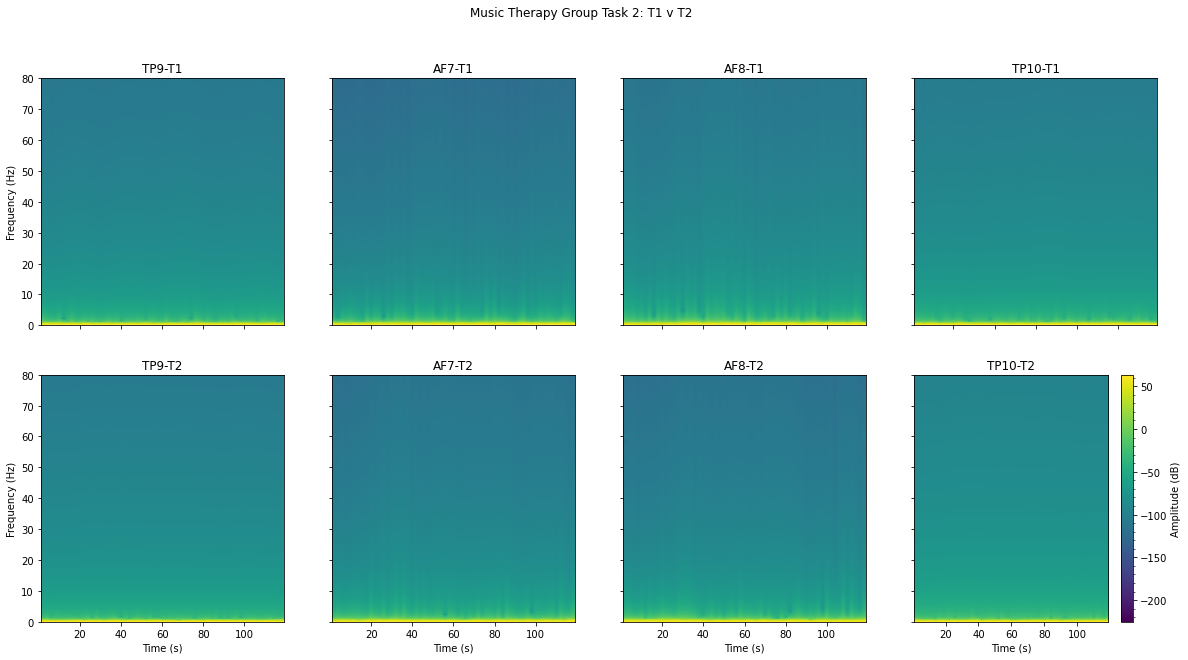

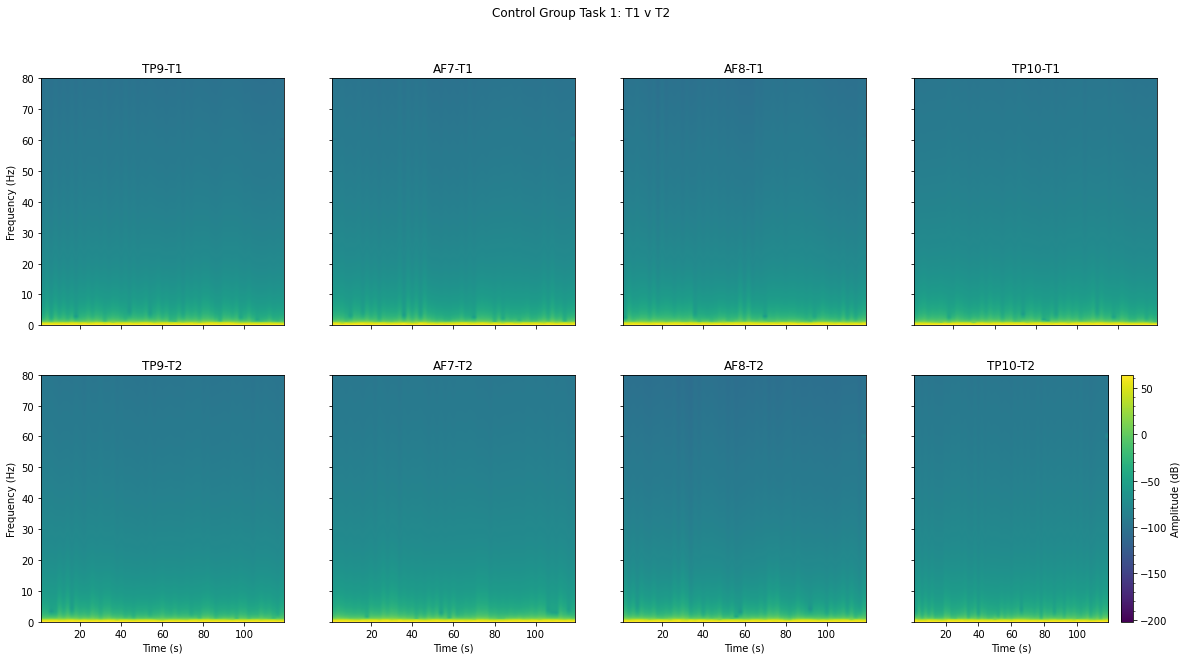

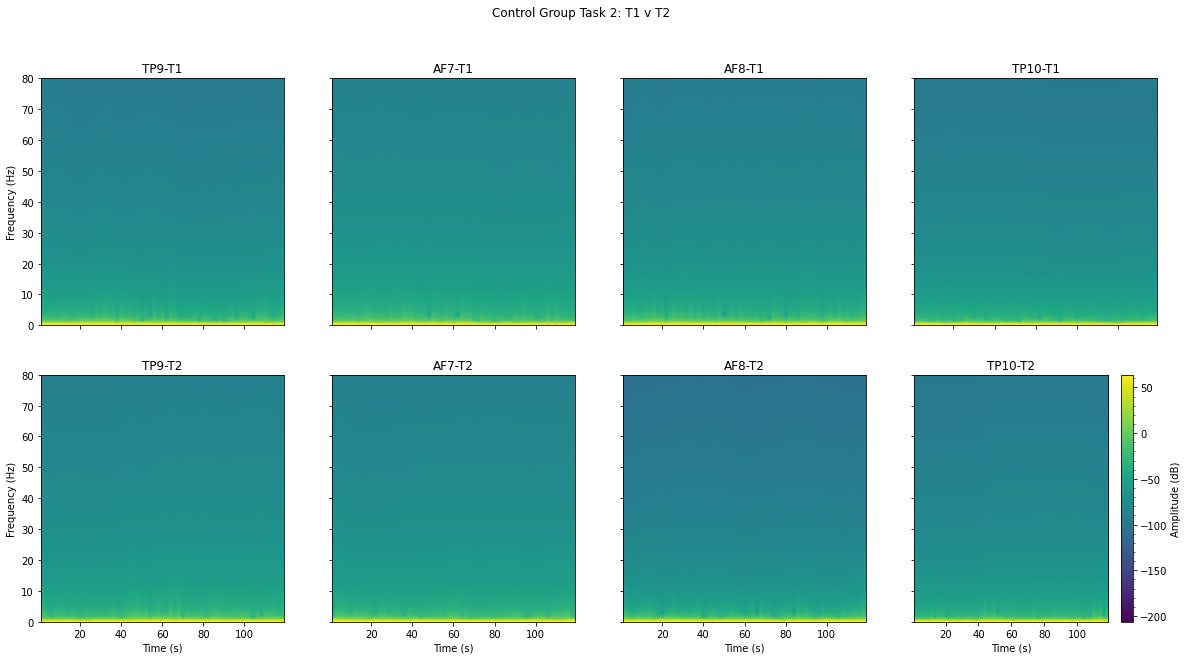

In [6]:
"notch filter the output files"
noc=filters()
notch_MT11,notch_MT12,notch_MT13,notch_MT21,notch_MT22,notch_MT23 = [],[],[],[],[],[]
notch_CT11,notch_CT12,notch_CT13,notch_CT21,notch_CT22,notch_CT23 = [],[],[],[],[],[]
for i in range(len(MT11)):
    notch_MT11.append(noc.notch(MT11[i,:,:],line,fs,Q))
    notch_MT12.append(noc.notch(MT12[i,:,:],line,fs,Q))
    notch_MT13.append(noc.notch(MT13[i,:,:],line,fs,Q))
    notch_MT21.append(noc.notch(MT21[i,:,:],line,fs,Q))
    notch_MT22.append(noc.notch(MT22[i,:,:],line,fs,Q))
    notch_MT23.append(noc.notch(MT23[i,:,:],line,fs,Q))
notch_MT11 = np.array(notch_MT11)
notch_MT12 = np.array(notch_MT12)
notch_MT13 = np.array(notch_MT13)
notch_MT21 = np.array(notch_MT21)
notch_MT22 = np.array(notch_MT22)
notch_MT23 = np.array(notch_MT23)
for j in range(len(CT11)):
    notch_CT11.append(noc.notch(CT11[j,:,:],line,fs,Q))
    notch_CT12.append(noc.notch(CT12[j,:,:],line,fs,Q))
    notch_CT13.append(noc.notch(CT13[j,:,:],line,fs,Q))
    notch_CT21.append(noc.notch(CT21[j,:,:],line,fs,Q))
    notch_CT22.append(noc.notch(CT22[j,:,:],line,fs,Q))
    notch_CT23.append(noc.notch(CT23[j,:,:],line,fs,Q))
notch_CT11 = np.array(notch_CT11)
notch_CT12 = np.array(notch_CT12)
notch_CT13 = np.array(notch_CT13)
notch_CT21 = np.array(notch_CT21)
notch_CT22 = np.array(notch_CT22)
notch_CT23 = np.array(notch_CT23)

"Develop spectogram plot"
mean_notch_MT11 = np.mean(notch_MT11,axis=0)
mean_notch_MT12 = np.mean(notch_MT12,axis=0)
mean_notch_MT21 = np.mean(notch_MT21,axis=0)
mean_notch_MT22 = np.mean(notch_MT22,axis=0)
mean_notch_CT11 = np.mean(notch_CT11,axis=0)
mean_notch_CT12 = np.mean(notch_CT12,axis=0)
mean_notch_CT21 = np.mean(notch_CT21,axis=0)
mean_notch_CT22 = np.mean(notch_CT22,axis=0)
mean_notch_MT11_channels = np.mean(mean_notch_MT11,axis=1)
mean_notch_MT11_channels = mean_notch_MT11_channels.reshape(mean_notch_MT11_channels.shape[0],1)
mean_notch_MT12_channels = np.mean(mean_notch_MT12,axis=1)
mean_notch_MT12_channels = mean_notch_MT12_channels.reshape(mean_notch_MT12_channels.shape[0],1)
mean_notch_MT21_channels = np.mean(mean_notch_MT21,axis=1)
mean_notch_MT21_channels = mean_notch_MT21_channels.reshape(mean_notch_MT21_channels.shape[0],1)
mean_notch_MT22_channels = np.mean(mean_notch_MT22,axis=1)
mean_notch_MT22_channels = mean_notch_MT22_channels.reshape(mean_notch_MT22_channels.shape[0],1)
mean_notch_CT11_channels = np.mean(mean_notch_CT11,axis=1)
mean_notch_CT11_channels = mean_notch_CT11_channels.reshape(mean_notch_CT11_channels.shape[0],1)
mean_notch_CT12_channels = np.mean(mean_notch_CT12,axis=1)
mean_notch_CT12_channels = mean_notch_CT12_channels.reshape(mean_notch_CT12_channels.shape[0],1)
mean_notch_CT21_channels = np.mean(mean_notch_CT21,axis=1)
mean_notch_CT21_channels = mean_notch_CT21_channels.reshape(mean_notch_CT21_channels.shape[0],1)
mean_notch_CT22_channels = np.mean(mean_notch_CT22,axis=1)
mean_notch_CT22_channels = mean_notch_CT22_channels.reshape(mean_notch_CT22_channels.shape[0],1)

spectogramPlot((np.hstack((mean_notch_MT11_channels,mean_notch_MT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_MT21_channels,mean_notch_MT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT11_channels,mean_notch_CT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT21_channels,mean_notch_CT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_notch_MT11,mean_notch_MT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_MT21,mean_notch_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT11,mean_notch_CT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT21,mean_notch_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')

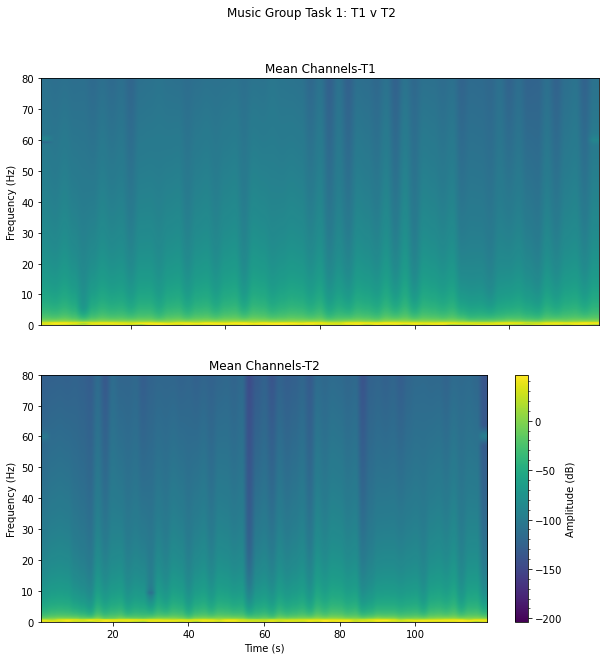

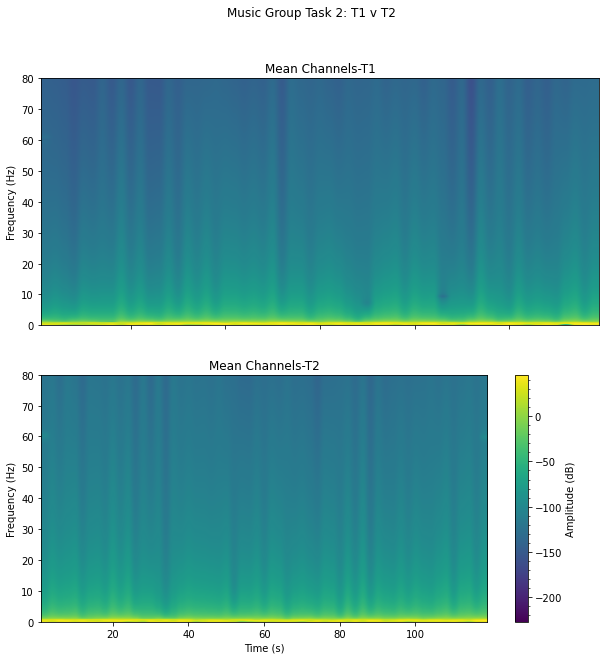

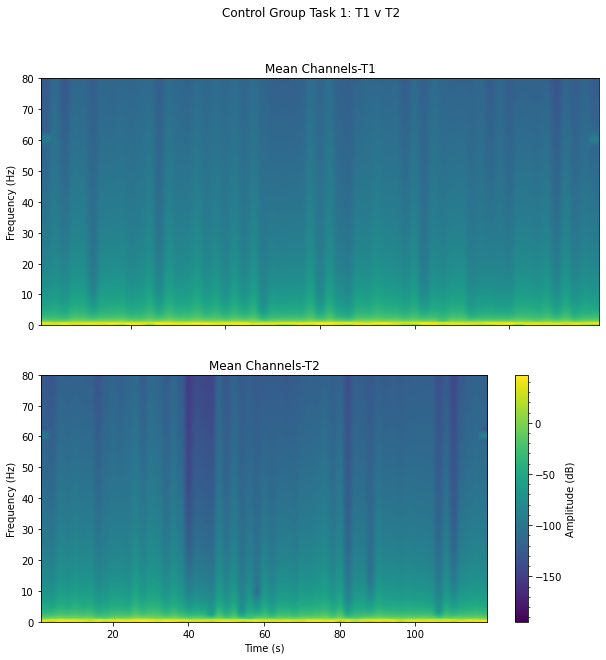

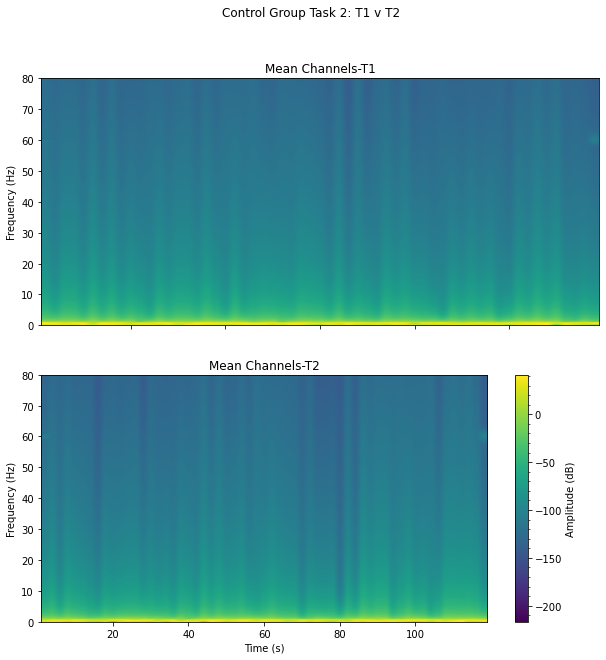

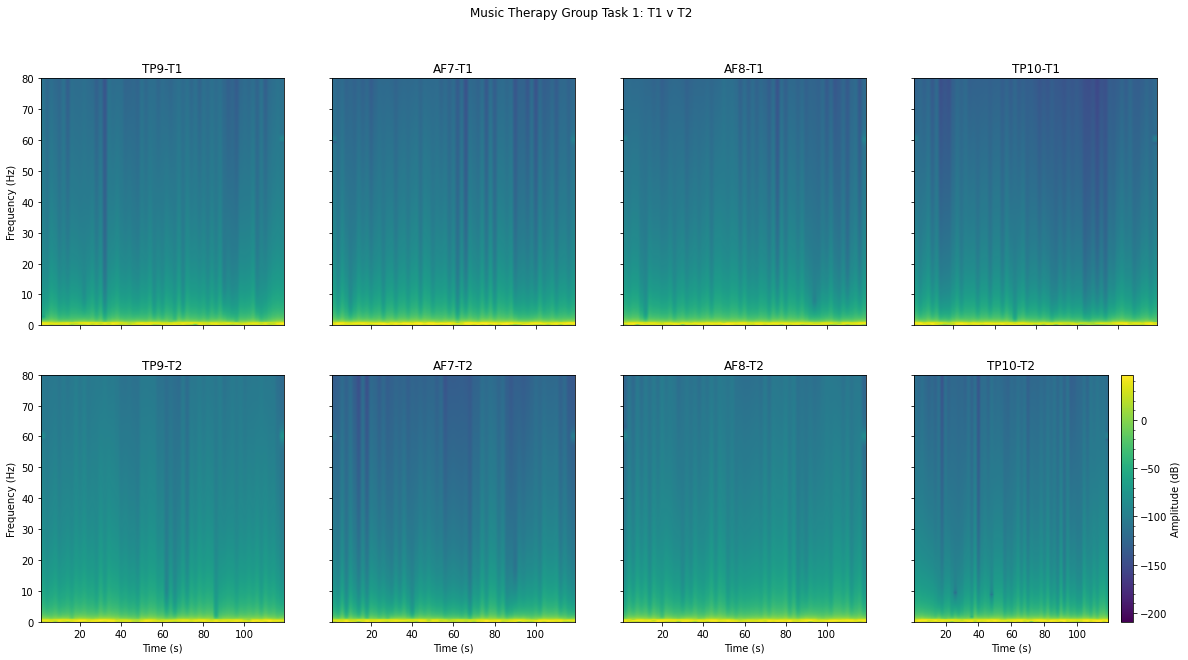

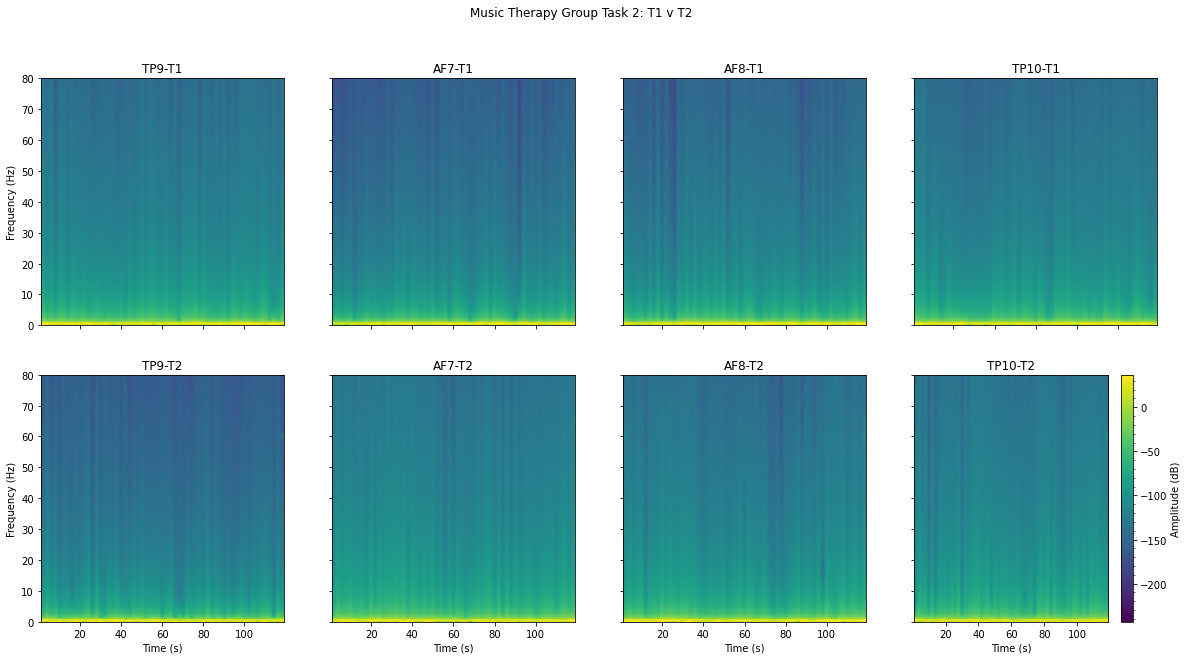

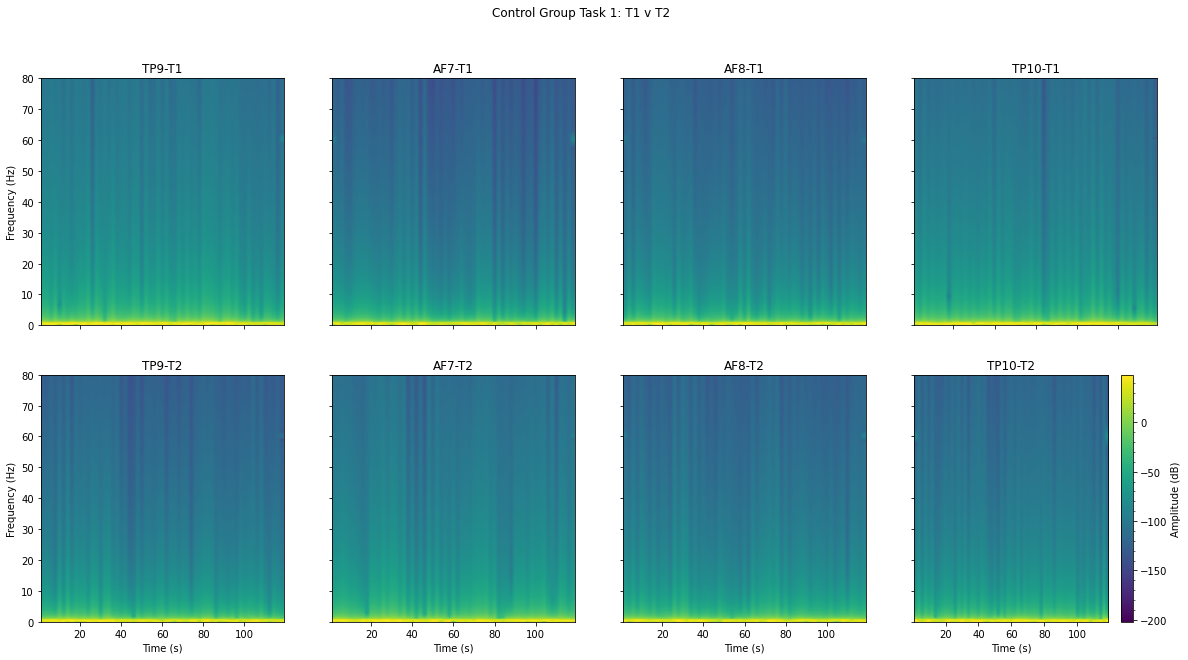

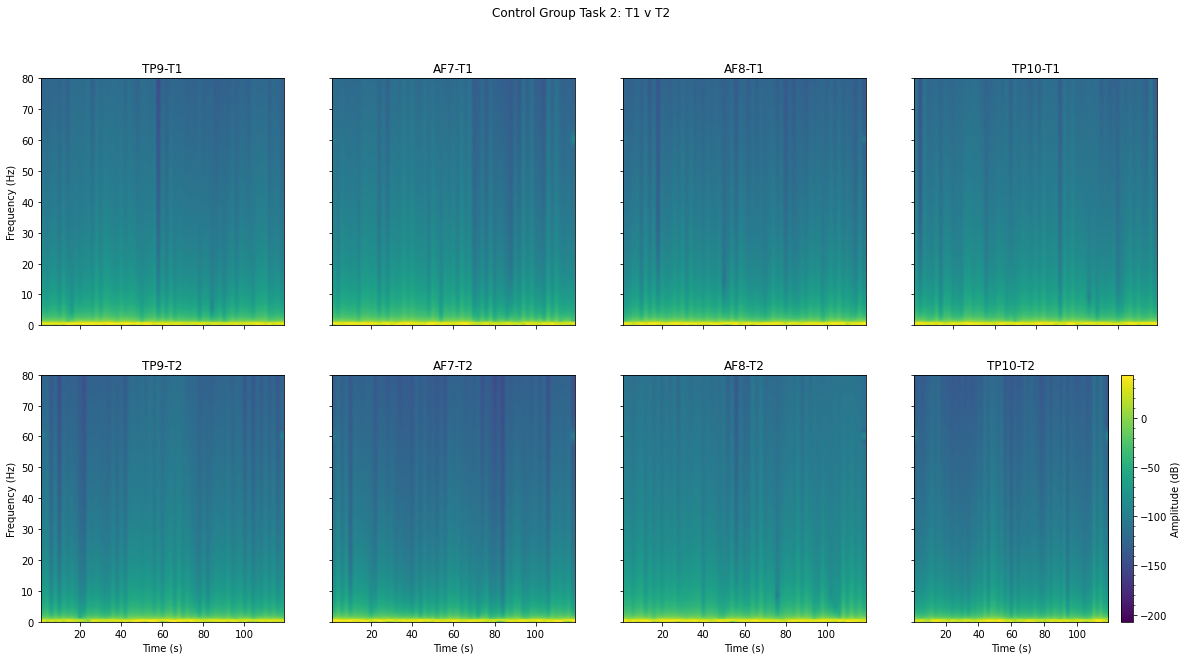

In [7]:
bp = filters()
bp_MT11 = []
bp_MT12 = []
bp_MT13 = []
bp_MT21 = []
bp_MT22 = []
bp_MT23 = []
bp_CT11 = []
bp_CT12 = []
bp_CT13 = []
bp_CT21 = []
bp_CT22 = []
bp_CT23 = []
for i in range(len(notch_MT11)):
    bp_MT11.append(bp.butterBandPass(notch_MT11[i],lowcut,highcut,fs,order))
    bp_MT12.append(bp.butterBandPass(notch_MT12[i],lowcut,highcut,fs,order))
    bp_MT13.append(bp.butterBandPass(notch_MT13[i],lowcut,highcut,fs,order))
    bp_MT21.append(bp.butterBandPass(notch_MT21[i],lowcut,highcut,fs,order))
    bp_MT22.append(bp.butterBandPass(notch_MT22[i],lowcut,highcut,fs,order))
    bp_MT23.append(bp.butterBandPass(notch_MT23[i],lowcut,highcut,fs,order))
    bp_CT11.append(bp.butterBandPass(notch_CT11[i],lowcut,highcut,fs,order))
    bp_CT12.append(bp.butterBandPass(notch_CT12[i],lowcut,highcut,fs,order))
    bp_CT13.append(bp.butterBandPass(notch_CT13[i],lowcut,highcut,fs,order))
    bp_CT21.append(bp.butterBandPass(notch_CT21[i],lowcut,highcut,fs,order))
    bp_CT22.append(bp.butterBandPass(notch_CT22[i],lowcut,highcut,fs,order))
    bp_CT23.append(bp.butterBandPass(notch_CT23[i],lowcut,highcut,fs,order))
bp_MT11 = np.array(bp_MT11)
bp_MT12 = np.array(bp_MT12)
bp_MT13 = np.array(bp_MT13)
bp_MT21 = np.array(bp_MT21)
bp_MT22 = np.array(bp_MT22)
bp_MT23 = np.array(bp_MT23)
bp_CT11 = np.array(bp_CT11)
bp_CT12 = np.array(bp_CT12)
bp_CT13 = np.array(bp_CT13)
bp_CT21 = np.array(bp_CT21)
bp_CT22 = np.array(bp_CT22)
bp_CT23 = np.array(bp_CT23)

"Develop spectogram plot"
mean_bp_MT11 = np.mean(bp_MT11,axis=0)
mean_bp_MT12 = np.mean(bp_MT12,axis=0)
mean_bp_MT13 = np.mean(bp_MT13,axis=0)
mean_bp_MT21 = np.mean(bp_MT21,axis=0)
mean_bp_MT22 = np.mean(bp_MT22,axis=0)
mean_bp_MT23 = np.mean(bp_MT23,axis=0)
mean_bp_CT11 = np.mean(bp_CT11,axis=0)
mean_bp_CT12 = np.mean(bp_CT12,axis=0)
mean_bp_CT13 = np.mean(bp_CT13,axis=0)
mean_bp_CT21 = np.mean(bp_CT21,axis=0)
mean_bp_CT22 = np.mean(bp_CT22,axis=0)
mean_bp_CT23 = np.mean(bp_CT23,axis=0)
mean_bp_MT11_channels = np.mean(mean_bp_MT11,axis=1)
mean_bp_MT11_channels = mean_bp_MT11_channels.reshape(mean_bp_MT11_channels.shape[0],1)
mean_bp_MT12_channels = np.mean(mean_bp_MT12,axis=1)
mean_bp_MT12_channels = mean_bp_MT12_channels.reshape(mean_bp_MT12_channels.shape[0],1)
mean_bp_MT13_channels = np.mean(mean_bp_MT13,axis=1)
mean_bp_MT13_channels = mean_bp_MT13_channels.reshape(mean_bp_MT13_channels.shape[0],1)
mean_bp_MT21_channels = np.mean(mean_bp_MT21,axis=1)
mean_bp_MT21_channels = mean_bp_MT21_channels.reshape(mean_bp_MT21_channels.shape[0],1)
mean_bp_MT22_channels = np.mean(mean_bp_MT22,axis=1)
mean_bp_MT22_channels = mean_bp_MT22_channels.reshape(mean_bp_MT22_channels.shape[0],1)
mean_bp_MT23_channels = np.mean(mean_bp_MT23,axis=1)
mean_bp_MT23_channels = mean_bp_MT23_channels.reshape(mean_bp_MT23_channels.shape[0],1)
mean_bp_CT11_channels = np.mean(mean_bp_CT11,axis=1)
mean_bp_CT11_channels = mean_bp_CT11_channels.reshape(mean_bp_CT11_channels.shape[0],1)
mean_bp_CT12_channels = np.mean(mean_bp_CT12,axis=1)
mean_bp_CT12_channels = mean_bp_CT12_channels.reshape(mean_bp_CT12_channels.shape[0],1)
mean_bp_CT13_channels = np.mean(mean_bp_CT13,axis=1)
mean_bp_CT13_channels = mean_bp_CT13_channels.reshape(mean_bp_CT13_channels.shape[0],1)
mean_bp_CT21_channels = np.mean(mean_bp_CT21,axis=1)
mean_bp_CT21_channels = mean_bp_CT21_channels.reshape(mean_bp_CT21_channels.shape[0],1)
mean_bp_CT22_channels = np.mean(mean_bp_CT22,axis=1)
mean_bp_CT22_channels = mean_bp_CT22_channels.reshape(mean_bp_CT22_channels.shape[0],1)
mean_bp_CT23_channels = np.mean(mean_bp_CT23,axis=1)
mean_bp_CT23_channels = mean_bp_CT23_channels.reshape(mean_bp_CT23_channels.shape[0],1)

spectogramPlot((np.hstack((mean_bp_MT11_channels,mean_bp_MT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT21_channels,mean_bp_MT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT11_channels,mean_bp_CT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT21_channels,mean_bp_CT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT11,mean_bp_MT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT21,mean_bp_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT11,mean_bp_CT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT21,mean_bp_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')   


In [8]:
"compute power spectrum of each window per channel"
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]
beta_1 = [12,16]
beta_2 = [17,21]
beta_3 = [22,32]

In [9]:
bp_MT11 = bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1])
bp_MT12 = bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1])
bp_MT13 = bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1])
bp_MT21 = bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1])
bp_MT22 = bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1])
bp_MT23 = bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1])
bp_CT11 = bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1])
bp_CT12 = bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1])
bp_CT13 = bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1])
bp_CT21 = bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1])
bp_CT22 = bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1])
bp_CT23 = bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1])

In [10]:
"Compute the average band power for both the music therapy and control group"
#   compute average delta band power for both music therapy and control group
# input array: channels x participants x sample points
delta_MT11 = averageBandPower(bp_MT11,'3D',fs,delta_low,delta_high,win)
delta_MT12 = averageBandPower(bp_MT12,'3D',fs,delta_low,delta_high,win)
delta_MT13 = averageBandPower(bp_MT13,'3D',fs,delta_low,delta_high,win)
delta_MT21 = averageBandPower(bp_MT21,'3D',fs,delta_low,delta_high,win)
delta_MT22 = averageBandPower(bp_MT22,'3D',fs,delta_low,delta_high,win)
delta_MT23 = averageBandPower(bp_MT23,'3D',fs,delta_low,delta_high,win)
delta_CT11 = averageBandPower(bp_CT11,'3D',fs,delta_low,delta_high,win)
delta_CT12 = averageBandPower(bp_CT12,'3D',fs,delta_low,delta_high,win)
delta_CT13 = averageBandPower(bp_CT13,'3D',fs,delta_low,delta_high,win)
delta_CT21 = averageBandPower(bp_CT21,'3D',fs,delta_low,delta_high,win)
delta_CT22 = averageBandPower(bp_CT22,'3D',fs,delta_low,delta_high,win)
delta_CT23 = averageBandPower(bp_CT23,'3D',fs,delta_low,delta_high,win)
#   compute average theta band power for both music therapy and control group
theta_MT11 = averageBandPower(bp_MT11,'3D',fs,theta_low,theta_high,win)
theta_MT12 = averageBandPower(bp_MT12,'3D',fs,theta_low,theta_high,win)
theta_MT13 = averageBandPower(bp_MT13,'3D',fs,theta_low,theta_high,win)
theta_MT21 = averageBandPower(bp_MT21,'3D',fs,theta_low,theta_high,win)
theta_MT22 = averageBandPower(bp_MT22,'3D',fs,theta_low,theta_high,win)
theta_MT23 = averageBandPower(bp_MT23,'3D',fs,theta_low,theta_high,win)
theta_CT11 = averageBandPower(bp_CT11,'3D',fs,theta_low,theta_high,win)
theta_CT12 = averageBandPower(bp_CT12,'3D',fs,theta_low,theta_high,win)
theta_CT13 = averageBandPower(bp_CT13,'3D',fs,theta_low,theta_high,win)
theta_CT21 = averageBandPower(bp_CT21,'3D',fs,theta_low,theta_high,win)
theta_CT22 = averageBandPower(bp_CT22,'3D',fs,theta_low,theta_high,win)
theta_CT23 = averageBandPower(bp_CT23,'3D',fs,theta_low,theta_high,win)
#   compute average alpha band power for both music therapy and control group
alpha_MT11 = averageBandPower(bp_MT11,'3D',fs,alpha_low,alpha_high,win)
alpha_MT12 = averageBandPower(bp_MT12,'3D',fs,alpha_low,alpha_high,win)
alpha_MT13 = averageBandPower(bp_MT13,'3D',fs,alpha_low,alpha_high,win)
alpha_MT21 = averageBandPower(bp_MT21,'3D',fs,alpha_low,alpha_high,win)
alpha_MT22 = averageBandPower(bp_MT22,'3D',fs,alpha_low,alpha_high,win)
alpha_MT23 = averageBandPower(bp_MT23,'3D',fs,alpha_low,alpha_high,win)
alpha_CT11 = averageBandPower(bp_CT11,'3D',fs,alpha_low,alpha_high,win)
alpha_CT12 = averageBandPower(bp_CT12,'3D',fs,alpha_low,alpha_high,win)
alpha_CT13 = averageBandPower(bp_CT13,'3D',fs,alpha_low,alpha_high,win)
alpha_CT21 = averageBandPower(bp_CT21,'3D',fs,alpha_low,alpha_high,win)
alpha_CT22 = averageBandPower(bp_CT22,'3D',fs,alpha_low,alpha_high,win)
alpha_CT23 = averageBandPower(bp_CT23,'3D',fs,alpha_low,alpha_high,win)
#   compute average beta band power for both music therapy and control group
beta_MT11 = averageBandPower(bp_MT11,'3D',fs,beta_low,beta_high,win)
beta_MT12 = averageBandPower(bp_MT12,'3D',fs,beta_low,beta_high,win)
beta_MT13 = averageBandPower(bp_MT13,'3D',fs,beta_low,beta_high,win)
beta_MT21 = averageBandPower(bp_MT21,'3D',fs,beta_low,beta_high,win)
beta_MT22 = averageBandPower(bp_MT22,'3D',fs,beta_low,beta_high,win)
beta_MT23 = averageBandPower(bp_MT23,'3D',fs,beta_low,beta_high,win)
beta_CT11 = averageBandPower(bp_CT11,'3D',fs,beta_low,beta_high,win)
beta_CT12 = averageBandPower(bp_CT12,'3D',fs,beta_low,beta_high,win)
beta_CT13 = averageBandPower(bp_CT13,'3D',fs,beta_low,beta_high,win)
beta_CT21 = averageBandPower(bp_CT21,'3D',fs,beta_low,beta_high,win)
beta_CT22 = averageBandPower(bp_CT22,'3D',fs,beta_low,beta_high,win)
beta_CT23 = averageBandPower(bp_CT23,'3D',fs,beta_low,beta_high,win)
#   compute average beta one band power for both music therapy and control group
beta1_MT11 = averageBandPower(bp_MT11,'3D',fs,beta_1[0],beta_1[1],win)
beta1_MT12 = averageBandPower(bp_MT12,'3D',fs,beta_1[0],beta_1[1],win)
beta1_MT13 = averageBandPower(bp_MT13,'3D',fs,beta_1[0],beta_1[1],win)
beta1_MT21 = averageBandPower(bp_MT21,'3D',fs,beta_1[0],beta_1[1],win)
beta1_MT22 = averageBandPower(bp_MT22,'3D',fs,beta_1[0],beta_1[1],win)
beta1_MT23 = averageBandPower(bp_MT23,'3D',fs,beta_1[0],beta_1[1],win)
beta1_CT11 = averageBandPower(bp_CT11,'3D',fs,beta_1[0],beta_1[1],win)
beta1_CT12 = averageBandPower(bp_CT12,'3D',fs,beta_1[0],beta_1[1],win)
beta1_CT13 = averageBandPower(bp_CT13,'3D',fs,beta_1[0],beta_1[1],win)
beta1_CT21 = averageBandPower(bp_CT21,'3D',fs,beta_1[0],beta_1[1],win)
beta1_CT22 = averageBandPower(bp_CT22,'3D',fs,beta_1[0],beta_1[1],win)
beta1_CT23 = averageBandPower(bp_CT23,'3D',fs,beta_1[0],beta_1[1],win)
#   compute average beta two band power for both music therapy and control group
beta2_MT11 = averageBandPower(bp_MT11,'3D',fs,beta_2[0],beta_2[1],win)
beta2_MT12 = averageBandPower(bp_MT12,'3D',fs,beta_2[0],beta_2[1],win)
beta2_MT13 = averageBandPower(bp_MT13,'3D',fs,beta_2[0],beta_2[1],win)
beta2_MT21 = averageBandPower(bp_MT21,'3D',fs,beta_2[0],beta_2[1],win)
beta2_MT22 = averageBandPower(bp_MT22,'3D',fs,beta_2[0],beta_2[1],win)
beta2_MT23 = averageBandPower(bp_MT23,'3D',fs,beta_2[0],beta_2[1],win)
beta2_CT11 = averageBandPower(bp_CT11,'3D',fs,beta_2[0],beta_2[1],win)
beta2_CT12 = averageBandPower(bp_CT12,'3D',fs,beta_2[0],beta_2[1],win)
beta2_CT13 = averageBandPower(bp_CT13,'3D',fs,beta_2[0],beta_2[1],win)
beta2_CT21 = averageBandPower(bp_CT21,'3D',fs,beta_2[0],beta_2[1],win)
beta2_CT22 = averageBandPower(bp_CT22,'3D',fs,beta_2[0],beta_2[1],win)
beta2_CT23 = averageBandPower(bp_CT23,'3D',fs,beta_2[0],beta_2[1],win)
#   compute average beta three band power for both music therapy and control group
beta3_MT11 = averageBandPower(bp_MT11,'3D',fs,beta_3[0],beta_3[1],win)
beta3_MT12 = averageBandPower(bp_MT12,'3D',fs,beta_3[0],beta_3[1],win)
beta3_MT13 = averageBandPower(bp_MT13,'3D',fs,beta_3[0],beta_3[1],win)
beta3_MT21 = averageBandPower(bp_MT21,'3D',fs,beta_3[0],beta_3[1],win)
beta3_MT22 = averageBandPower(bp_MT22,'3D',fs,beta_3[0],beta_3[1],win)
beta3_MT23 = averageBandPower(bp_MT23,'3D',fs,beta_3[0],beta_3[1],win)
beta3_CT11 = averageBandPower(bp_CT11,'3D',fs,beta_3[0],beta_3[1],win)
beta3_CT12 = averageBandPower(bp_CT12,'3D',fs,beta_3[0],beta_3[1],win)
beta3_CT13 = averageBandPower(bp_CT13,'3D',fs,beta_3[0],beta_3[1],win)
beta3_CT21 = averageBandPower(bp_CT21,'3D',fs,beta_3[0],beta_3[1],win)
beta3_CT22 = averageBandPower(bp_CT22,'3D',fs,beta_3[0],beta_3[1],win)
beta3_CT23 = averageBandPower(bp_CT23,'3D',fs,beta_3[0],beta_3[1],win)
#   compute average theta to beta ratio for both music therapy and control group
theta_beta_MT11 = theta_MT11/beta_MT11
theta_beta_MT12 = theta_MT12/beta_MT12
theta_beta_MT13 = theta_MT13/beta_MT13
theta_beta_MT21 = theta_MT21/beta_MT21
theta_beta_MT22 = theta_MT22/beta_MT22
theta_beta_MT23 = theta_MT23/beta_MT23
theta_beta_CT11 = theta_CT11/beta_CT11
theta_beta_CT12 = theta_CT12/beta_CT12
theta_beta_CT13 = theta_CT13/beta_CT13
theta_beta_CT21 = theta_CT21/beta_CT21
theta_beta_CT22 = theta_CT22/beta_CT22
theta_beta_CT23 = theta_CT23/beta_CT23
#   compute average alpha to beta ratio for both music therapy and control group
alpha_beta_MT11 = alpha_MT11/beta_MT11
alpha_beta_MT12 = alpha_MT12/beta_MT12
alpha_beta_MT13 = alpha_MT13/beta_MT13
alpha_beta_MT21 = alpha_MT21/beta_MT21
alpha_beta_MT22 = alpha_MT22/beta_MT22
alpha_beta_MT23 = alpha_MT23/beta_MT23
alpha_beta_CT11 = alpha_CT11/beta_CT11
alpha_beta_CT12 = alpha_CT12/beta_CT12
alpha_beta_CT13 = alpha_CT13/beta_CT13
alpha_beta_CT21 = alpha_CT21/beta_CT21
alpha_beta_CT22 = alpha_CT22/beta_CT22
alpha_beta_CT23 = alpha_CT23/beta_CT23
#   compute average gamma band power for both music therapy and control group
gamma_MT11 = averageBandPower(bp_MT11,'3D',fs,gamma_low,gamma_high,win)
gamma_MT12 = averageBandPower(bp_MT12,'3D',fs,gamma_low,gamma_high,win)
gamma_MT13 = averageBandPower(bp_MT13,'3D',fs,gamma_low,gamma_high,win)
gamma_MT21 = averageBandPower(bp_MT21,'3D',fs,gamma_low,gamma_high,win)
gamma_MT22 = averageBandPower(bp_MT22,'3D',fs,gamma_low,gamma_high,win)
gamma_MT23 = averageBandPower(bp_MT23,'3D',fs,gamma_low,gamma_high,win)
gamma_CT11 = averageBandPower(bp_CT11,'3D',fs,gamma_low,gamma_high,win)
gamma_CT12 = averageBandPower(bp_CT12,'3D',fs,gamma_low,gamma_high,win)
gamma_CT13 = averageBandPower(bp_CT13,'3D',fs,gamma_low,gamma_high,win)
gamma_CT21 = averageBandPower(bp_CT21,'3D',fs,gamma_low,gamma_high,win)
gamma_CT22 = averageBandPower(bp_CT22,'3D',fs,gamma_low,gamma_high,win)
gamma_CT23 = averageBandPower(bp_CT23,'3D',fs,gamma_low,gamma_high,win)
#   compute average difference between alpha in frontal region for both music therapy and control group
alpha_AF_MT11 = np.vstack((alpha_MT11[:,2]-alpha_MT11[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_MT12 = np.vstack((alpha_MT12[:,2]-alpha_MT12[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_MT13 = np.vstack((alpha_MT13[:,2]-alpha_MT13[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_MT21 = np.vstack((alpha_MT21[:,2]-alpha_MT21[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_MT22 = np.vstack((alpha_MT22[:,2]-alpha_MT22[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_MT23 = np.vstack((alpha_MT23[:,2]-alpha_MT23[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_CT11 = np.vstack((alpha_CT11[:,2]-alpha_CT11[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_CT12 = np.vstack((alpha_CT12[:,2]-alpha_CT12[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_CT13 = np.vstack((alpha_CT13[:,2]-alpha_CT13[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_CT21 = np.vstack((alpha_CT21[:,2]-alpha_CT21[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_CT22 = np.vstack((alpha_CT22[:,2]-alpha_CT22[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_AF_CT23 = np.vstack((alpha_CT23[:,2]-alpha_CT23[:,1],np.zeros(5),np.zeros(5),np.zeros(5))).T

alpha_TP_MT11 = np.vstack((alpha_MT11[:,3]-alpha_MT11[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_MT12 = np.vstack((alpha_MT12[:,3]-alpha_MT12[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_MT13 = np.vstack((alpha_MT13[:,3]-alpha_MT13[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_MT21 = np.vstack((alpha_MT21[:,3]-alpha_MT21[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_MT22 = np.vstack((alpha_MT22[:,3]-alpha_MT22[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_MT23 = np.vstack((alpha_MT23[:,3]-alpha_MT23[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_CT11 = np.vstack((alpha_CT11[:,3]-alpha_CT11[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_CT12 = np.vstack((alpha_CT12[:,3]-alpha_CT12[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_CT13 = np.vstack((alpha_CT13[:,3]-alpha_CT13[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_CT21 = np.vstack((alpha_CT21[:,3]-alpha_CT21[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_CT22 = np.vstack((alpha_CT22[:,3]-alpha_CT22[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_TP_CT23 = np.vstack((alpha_CT23[:,3]-alpha_CT23[:,0],np.zeros(5),np.zeros(5),np.zeros(5))).T

right_alpha_MT11 = np.mean(np.vstack((alpha_MT11[:,2],alpha_MT11[:,3])).T,axis=1)
left_alpha_MT11 = np.mean(np.vstack((alpha_MT11[:,1],alpha_MT11[:,0])).T,axis=1)
right_alpha_MT12 = np.mean(np.vstack((alpha_MT12[:,2],alpha_MT12[:,3])).T,axis=1)
left_alpha_MT12 = np.mean(np.vstack((alpha_MT12[:,1],alpha_MT12[:,0])).T,axis=1)
right_alpha_MT13 = np.mean(np.vstack((alpha_MT13[:,2],alpha_MT13[:,3])).T,axis=1)
left_alpha_MT13 = np.mean(np.vstack((alpha_MT13[:,1],alpha_MT13[:,0])).T,axis=1)
right_alpha_MT21 = np.mean(np.vstack((alpha_MT21[:,2],alpha_MT21[:,3])).T,axis=1)
left_alpha_MT21 = np.mean(np.vstack((alpha_MT21[:,1],alpha_MT21[:,0])).T,axis=1)
right_alpha_MT22 = np.mean(np.vstack((alpha_MT22[:,2],alpha_MT22[:,3])).T,axis=1)
left_alpha_MT22 = np.mean(np.vstack((alpha_MT22[:,1],alpha_MT22[:,0])).T,axis=1)
right_alpha_MT23 = np.mean(np.vstack((alpha_MT23[:,2],alpha_MT23[:,3])).T,axis=1)
left_alpha_MT23 = np.mean(np.vstack((alpha_MT23[:,1],alpha_MT23[:,0])).T,axis=1)
right_alpha_CT11 = np.mean(np.vstack((alpha_CT11[:,2],alpha_CT11[:,3])).T,axis=1)
left_alpha_CT11 = np.mean(np.vstack((alpha_CT11[:,1],alpha_CT11[:,0])).T,axis=1)
right_alpha_CT12 = np.mean(np.vstack((alpha_CT12[:,2],alpha_CT12[:,3])).T,axis=1)
left_alpha_CT12 = np.mean(np.vstack((alpha_CT12[:,1],alpha_CT12[:,0])).T,axis=1)
right_alpha_CT13 = np.mean(np.vstack((alpha_CT13[:,2],alpha_CT13[:,3])).T,axis=1)
left_alpha_CT13 = np.mean(np.vstack((alpha_CT13[:,1],alpha_CT13[:,0])).T,axis=1)
right_alpha_CT21 = np.mean(np.vstack((alpha_CT21[:,2],alpha_CT21[:,3])).T,axis=1)
left_alpha_CT21 = np.mean(np.vstack((alpha_CT21[:,1],alpha_CT21[:,0])).T,axis=1)
right_alpha_CT22 = np.mean(np.vstack((alpha_CT22[:,2],alpha_CT22[:,3])).T,axis=1)
left_alpha_CT22 = np.mean(np.vstack((alpha_CT22[:,1],alpha_CT22[:,0])).T,axis=1)
right_alpha_CT23 = np.mean(np.vstack((alpha_CT23[:,2],alpha_CT23[:,3])).T,axis=1)
left_alpha_CT23 = np.mean(np.vstack((alpha_CT23[:,1],alpha_CT23[:,0])).T,axis=1)

alpha_Mean_MT11 = np.vstack((right_alpha_MT11-left_alpha_MT11,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_MT12 = np.vstack((right_alpha_MT12-left_alpha_MT12,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_MT13 = np.vstack((right_alpha_MT13-left_alpha_MT13,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_MT21 = np.vstack((right_alpha_MT21-left_alpha_MT21,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_MT22 = np.vstack((right_alpha_MT22-left_alpha_MT22,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_MT23 = np.vstack((right_alpha_MT23-left_alpha_MT23,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_CT11 = np.vstack((right_alpha_CT11-left_alpha_CT11,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_CT12 = np.vstack((right_alpha_CT12-left_alpha_CT12,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_CT13 = np.vstack((right_alpha_CT13-left_alpha_CT13,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_CT21 = np.vstack((right_alpha_CT21-left_alpha_CT21,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_CT22 = np.vstack((right_alpha_CT22-left_alpha_CT22,np.zeros(5),np.zeros(5),np.zeros(5))).T
alpha_Mean_CT23 = np.vstack((right_alpha_CT23-left_alpha_CT23,np.zeros(5),np.zeros(5),np.zeros(5))).T


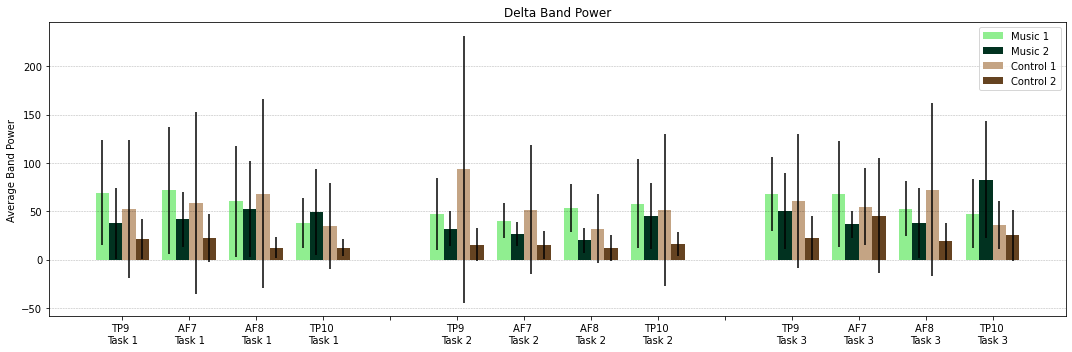

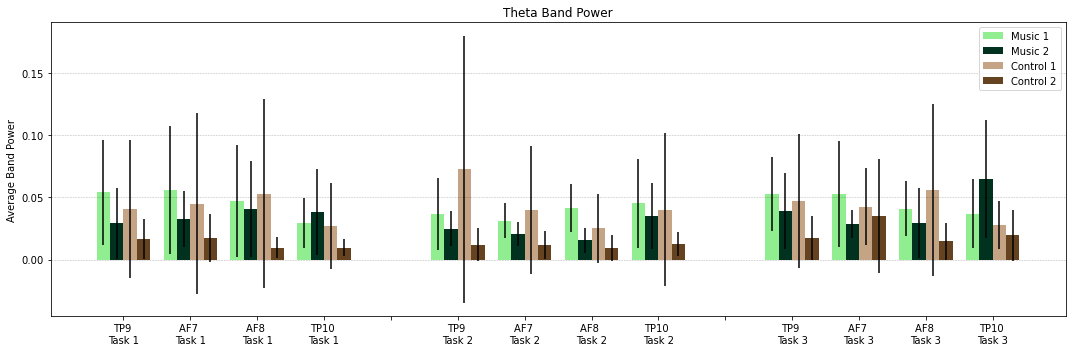

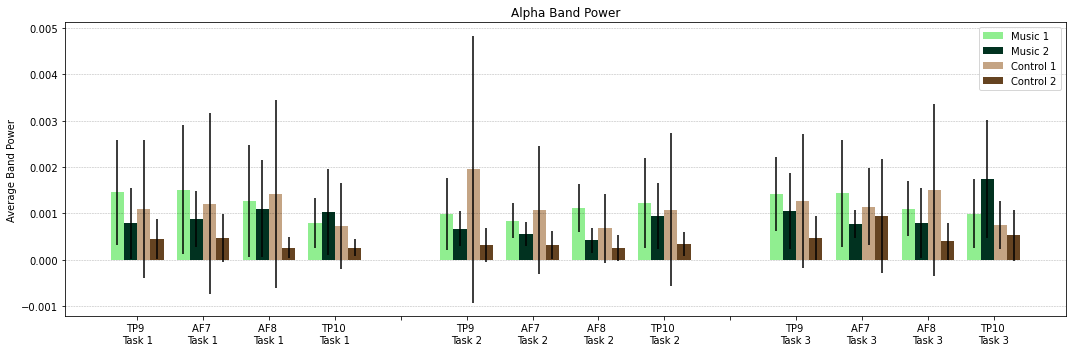

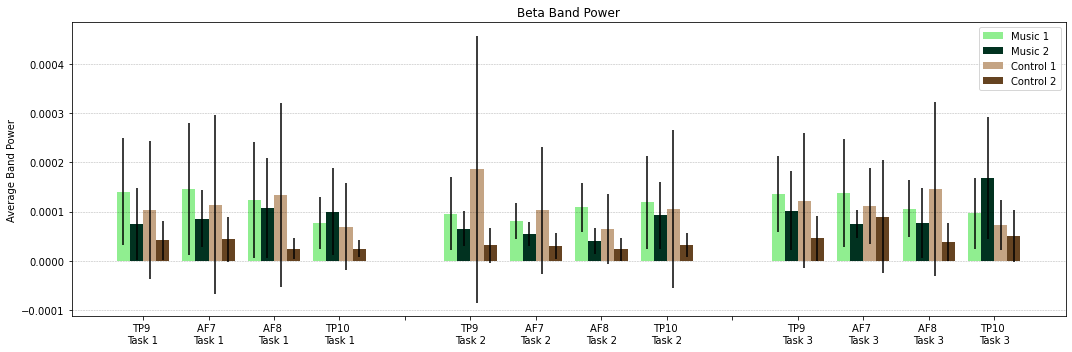

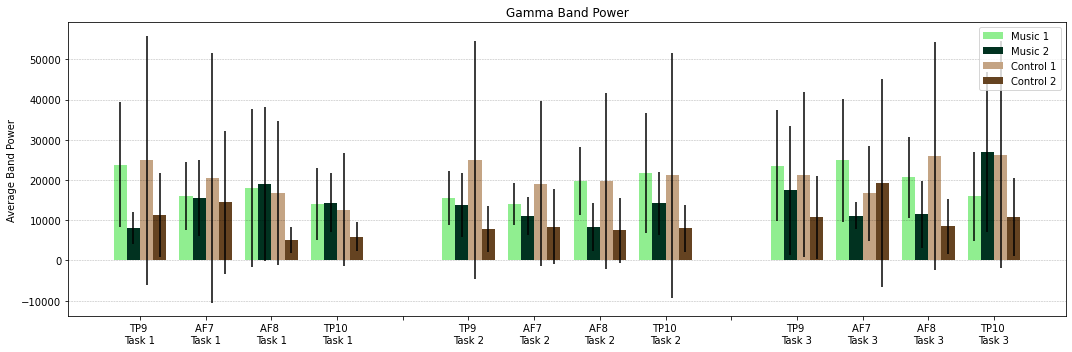

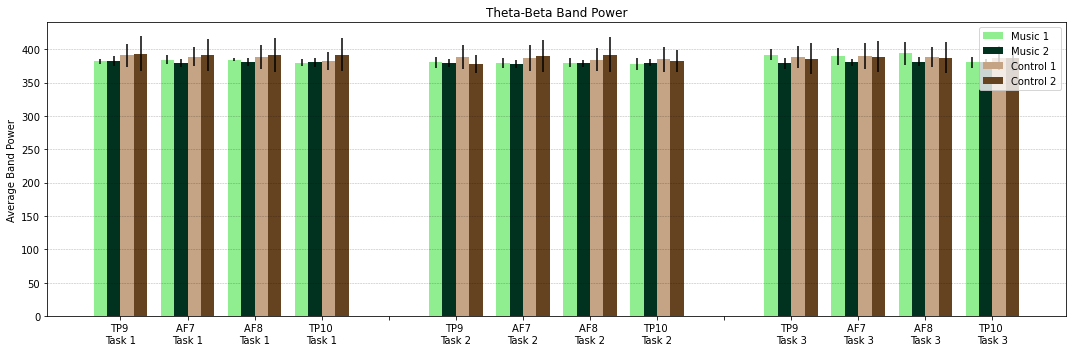

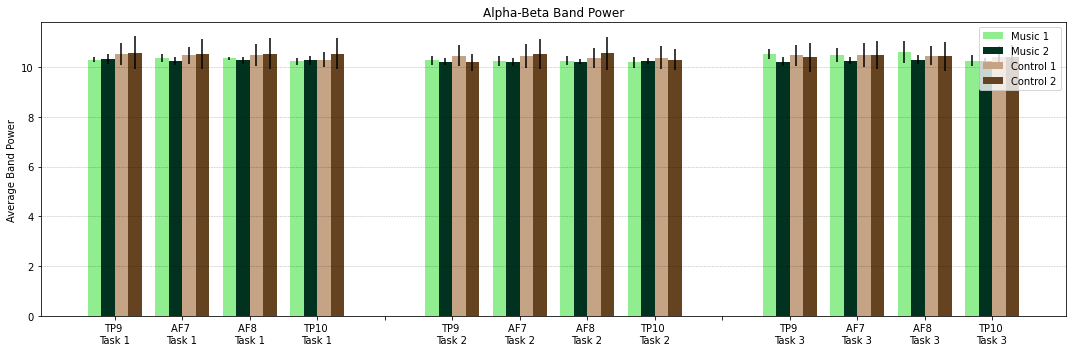

In [11]:
"""
Mean comparisons for bands that showed significant differences between the two groups 
(manually developed based on results from above)
"""

plot_averageBandPower([[delta_MT11,delta_MT12,delta_MT13],[delta_MT21,delta_MT22,delta_MT23]],
                        [[delta_CT11,delta_CT12,delta_CT13],[delta_CT21,delta_CT22,delta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Delta Band Power')

plot_averageBandPower([[theta_MT11,theta_MT12,theta_MT13],[theta_MT21,theta_MT22,theta_MT23]],
                        [[theta_CT11,theta_CT12,theta_CT13],[theta_CT21,theta_CT22,theta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta Band Power')

plot_averageBandPower([[alpha_MT11,alpha_MT12,alpha_MT13],[alpha_MT21,alpha_MT22,alpha_MT23]],
                        [[alpha_CT11,alpha_CT12,alpha_CT13],[alpha_CT21,alpha_CT22,alpha_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha Band Power')

plot_averageBandPower([[beta_MT11,beta_MT12,beta_MT13],[beta_MT21,beta_MT22,beta_MT23]],
                        [[beta_CT11,beta_CT12,beta_CT13],[beta_CT21,beta_CT22,beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Beta Band Power')

plot_averageBandPower([[gamma_MT11,gamma_MT12,gamma_MT13],[gamma_MT21,gamma_MT22,gamma_MT23]],
                        [[gamma_CT11,gamma_CT12,gamma_CT13],[gamma_CT21,gamma_CT22,gamma_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Gamma Band Power')
plot_averageBandPower([[theta_beta_MT11,theta_beta_MT12,theta_beta_MT13],[theta_beta_MT21,theta_beta_MT22,theta_beta_MT23]],
                        [[theta_beta_CT11,theta_beta_CT12,theta_beta_CT13],[theta_beta_CT21,theta_beta_CT22,theta_beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta-Beta Band Power')
plot_averageBandPower([[alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13],[alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23]],
                        [[alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13],[alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23]],  
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha-Beta Band Power')
                    

In [12]:
delta_TP1TK1_TP9 = np.hstack((delta_MT11[:,0],delta_CT11[:,0]))
delta_TP1TK2_TP9 = np.hstack((delta_MT12[:,0],delta_CT12[:,0]))
delta_TP2TK1_TP9 = np.hstack((delta_MT21[:,0],delta_CT21[:,0]))
delta_TP2TK2_TP9 = np.hstack((delta_MT22[:,0],delta_CT22[:,0]))

delta_TP1TK1_AF7 = np.hstack((delta_MT11[:,1],delta_CT11[:,1]))
delta_TP1TK2_AF7 = np.hstack((delta_MT12[:,1],delta_CT12[:,1]))
delta_TP2TK1_AF7 = np.hstack((delta_MT21[:,1],delta_CT21[:,1]))
delta_TP2TK2_AF7 = np.hstack((delta_MT22[:,1],delta_CT22[:,1]))

delta_TP1TK1_AF8 = np.hstack((delta_MT11[:,2],delta_CT11[:,2]))
delta_TP1TK2_AF8 = np.hstack((delta_MT12[:,2],delta_CT12[:,2]))
delta_TP2TK1_AF8 = np.hstack((delta_MT21[:,2],delta_CT21[:,2]))
delta_TP2TK2_AF8 = np.hstack((delta_MT22[:,2],delta_CT22[:,2]))

delta_TP1TK1_TP10 = np.hstack((delta_MT11[:,3],delta_CT11[:,3]))
delta_TP1TK2_TP10 = np.hstack((delta_MT12[:,3],delta_CT12[:,3]))
delta_TP2TK1_TP10 = np.hstack((delta_MT21[:,3],delta_CT21[:,3]))
delta_TP2TK2_TP10 = np.hstack((delta_MT22[:,3],delta_CT22[:,3]))

delta_TP1TK1_mean = np.mean(np.vstack((delta_TP1TK1_TP9,delta_TP1TK1_AF7,delta_TP1TK1_AF8,delta_TP1TK1_TP10)).T,axis=1)
delta_TP1TK2_mean = np.mean(np.vstack((delta_TP1TK2_TP9,delta_TP1TK2_AF7,delta_TP1TK2_AF8,delta_TP1TK2_TP10)).T,axis=1)
delta_TP2TK1_mean = np.mean(np.vstack((delta_TP2TK1_TP9,delta_TP2TK1_AF7,delta_TP2TK1_AF8,delta_TP2TK1_TP10)).T,axis=1)
delta_TP2TK2_mean = np.mean(np.vstack((delta_TP2TK2_TP9,delta_TP2TK2_AF7,delta_TP2TK2_AF8,delta_TP2TK2_TP10)).T,axis=1)

theta_TP1TK1_TP9 = np.hstack((theta_MT11[:,0],theta_CT11[:,0]))
theta_TP1TK2_TP9 = np.hstack((theta_MT12[:,0],theta_CT12[:,0]))
theta_TP2TK1_TP9 = np.hstack((theta_MT21[:,0],theta_CT21[:,0]))
theta_TP2TK2_TP9 = np.hstack((theta_MT22[:,0],theta_CT22[:,0]))

theta_TP1TK1_AF7 = np.hstack((theta_MT11[:,1],theta_CT11[:,1]))
theta_TP1TK2_AF7 = np.hstack((theta_MT12[:,1],theta_CT12[:,1]))
theta_TP2TK1_AF7 = np.hstack((theta_MT21[:,1],theta_CT21[:,1]))
theta_TP2TK2_AF7 = np.hstack((theta_MT22[:,1],theta_CT22[:,1]))

theta_TP1TK1_AF8 = np.hstack((theta_MT11[:,2],theta_CT11[:,2]))
theta_TP1TK2_AF8 = np.hstack((theta_MT12[:,2],theta_CT12[:,2]))
theta_TP2TK1_AF8 = np.hstack((theta_MT21[:,2],theta_CT21[:,2]))
theta_TP2TK2_AF8 = np.hstack((theta_MT22[:,2],theta_CT22[:,2]))

theta_TP1TK1_TP10 = np.hstack((theta_MT11[:,3],theta_CT11[:,3]))
theta_TP1TK2_TP10 = np.hstack((theta_MT12[:,3],theta_CT12[:,3]))
theta_TP2TK1_TP10 = np.hstack((theta_MT21[:,3],theta_CT21[:,3]))
theta_TP2TK2_TP10 = np.hstack((theta_MT22[:,3],theta_CT22[:,3]))

theta_TP1TK1_mean = np.mean(np.vstack((theta_TP1TK1_TP9,theta_TP1TK1_AF7,theta_TP1TK1_AF8,theta_TP1TK1_TP10)).T,axis=1)
theta_TP1TK2_mean = np.mean(np.vstack((theta_TP1TK2_TP9,theta_TP1TK2_AF7,theta_TP1TK2_AF8,theta_TP1TK2_TP10)).T,axis=1)
theta_TP2TK1_mean = np.mean(np.vstack((theta_TP2TK1_TP9,theta_TP2TK1_AF7,theta_TP2TK1_AF8,theta_TP2TK1_TP10)).T,axis=1)
theta_TP2TK2_mean = np.mean(np.vstack((theta_TP2TK2_TP9,theta_TP2TK2_AF7,theta_TP2TK2_AF8,theta_TP2TK2_TP10)).T,axis=1)

alpha_TP1TK1_TP9 = np.hstack((alpha_MT11[:,0],alpha_CT11[:,0]))
alpha_TP1TK2_TP9 = np.hstack((alpha_MT12[:,0],alpha_CT12[:,0]))
alpha_TP2TK1_TP9 = np.hstack((alpha_MT21[:,0],alpha_CT21[:,0]))
alpha_TP2TK2_TP9 = np.hstack((alpha_MT22[:,0],alpha_CT22[:,0]))

alpha_TP1TK1_AF7 = np.hstack((alpha_MT11[:,1],alpha_CT11[:,1]))
alpha_TP1TK2_AF7 = np.hstack((alpha_MT12[:,1],alpha_CT12[:,1]))
alpha_TP2TK1_AF7 = np.hstack((alpha_MT21[:,1],alpha_CT21[:,1]))
alpha_TP2TK2_AF7 = np.hstack((alpha_MT22[:,1],alpha_CT22[:,1]))

alpha_TP1TK1_AF8 = np.hstack((alpha_MT11[:,2],alpha_CT11[:,2]))
alpha_TP1TK2_AF8 = np.hstack((alpha_MT12[:,2],alpha_CT12[:,2]))
alpha_TP2TK1_AF8 = np.hstack((alpha_MT21[:,2],alpha_CT21[:,2]))
alpha_TP2TK2_AF8 = np.hstack((alpha_MT22[:,2],alpha_CT22[:,2]))

alpha_TP1TK1_TP10 = np.hstack((alpha_MT11[:,3],alpha_CT11[:,3]))
alpha_TP1TK2_TP10 = np.hstack((alpha_MT12[:,3],alpha_CT12[:,3]))
alpha_TP2TK1_TP10 = np.hstack((alpha_MT21[:,3],alpha_CT21[:,3]))
alpha_TP2TK2_TP10 = np.hstack((alpha_MT22[:,3],alpha_CT22[:,3]))

alpha_TP1TK1_mean = np.mean(np.vstack((alpha_TP1TK1_TP9,alpha_TP1TK1_AF7,alpha_TP1TK1_AF8,alpha_TP1TK1_TP10)).T,axis=1)
alpha_TP1TK2_mean = np.mean(np.vstack((alpha_TP1TK2_TP9,alpha_TP1TK2_AF7,alpha_TP1TK2_AF8,alpha_TP1TK2_TP10)).T,axis=1)
alpha_TP2TK1_mean = np.mean(np.vstack((alpha_TP2TK1_TP9,alpha_TP2TK1_AF7,alpha_TP2TK1_AF8,alpha_TP2TK1_TP10)).T,axis=1)
alpha_TP2TK2_mean = np.mean(np.vstack((alpha_TP2TK2_TP9,alpha_TP2TK2_AF7,alpha_TP2TK2_AF8,alpha_TP2TK2_TP10)).T,axis=1)

beta_TP1TK1_TP9 = np.hstack((beta_MT11[:,0],beta_CT11[:,0]))
beta_TP1TK2_TP9 = np.hstack((beta_MT12[:,0],beta_CT12[:,0]))
beta_TP2TK1_TP9 = np.hstack((beta_MT21[:,0],beta_CT21[:,0]))
beta_TP2TK2_TP9 = np.hstack((beta_MT22[:,0],beta_CT22[:,0]))

beta_TP1TK1_AF7 = np.hstack((beta_MT11[:,1],beta_CT11[:,1]))
beta_TP1TK2_AF7 = np.hstack((beta_MT12[:,1],beta_CT12[:,1]))
beta_TP2TK1_AF7 = np.hstack((beta_MT21[:,1],beta_CT21[:,1]))
beta_TP2TK2_AF7 = np.hstack((beta_MT22[:,1],beta_CT22[:,1]))

beta_TP1TK1_AF8 = np.hstack((beta_MT11[:,2],beta_CT11[:,2]))
beta_TP1TK2_AF8 = np.hstack((beta_MT12[:,2],beta_CT12[:,2]))
beta_TP2TK1_AF8 = np.hstack((beta_MT21[:,2],beta_CT21[:,2]))
beta_TP2TK2_AF8 = np.hstack((beta_MT22[:,2],beta_CT22[:,2]))

beta_TP1TK1_TP10 = np.hstack((beta_MT11[:,3],beta_CT11[:,3]))
beta_TP1TK2_TP10 = np.hstack((beta_MT12[:,3],beta_CT12[:,3]))
beta_TP2TK1_TP10 = np.hstack((beta_MT21[:,3],beta_CT21[:,3]))
beta_TP2TK2_TP10 = np.hstack((beta_MT22[:,3],beta_CT22[:,3]))

beta1_TP1TK1_TP9 = np.hstack((beta1_MT11[:,0],beta1_CT11[:,0]))
beta1_TP1TK2_TP9 = np.hstack((beta1_MT12[:,0],beta1_CT12[:,0]))
beta1_TP2TK1_TP9 = np.hstack((beta1_MT21[:,0],beta1_CT21[:,0]))
beta1_TP2TK2_TP9 = np.hstack((beta1_MT22[:,0],beta1_CT22[:,0]))
beta2_TP1TK1_TP9 = np.hstack((beta2_MT11[:,0],beta2_CT11[:,0]))
beta2_TP1TK2_TP9 = np.hstack((beta2_MT12[:,0],beta2_CT12[:,0]))
beta2_TP2TK1_TP9 = np.hstack((beta2_MT21[:,0],beta2_CT21[:,0]))
beta2_TP2TK2_TP9 = np.hstack((beta2_MT22[:,0],beta2_CT22[:,0]))
beta3_TP1TK1_TP9 = np.hstack((beta3_MT11[:,0],beta3_CT11[:,0]))
beta3_TP1TK2_TP9 = np.hstack((beta3_MT12[:,0],beta3_CT12[:,0]))
beta3_TP2TK1_TP9 = np.hstack((beta3_MT21[:,0],beta3_CT21[:,0]))
beta3_TP2TK2_TP9 = np.hstack((beta3_MT22[:,0],beta3_CT22[:,0]))

beta1_TP1TK1_AF7 = np.hstack((beta1_MT11[:,1],beta1_CT11[:,1]))
beta1_TP1TK2_AF7 = np.hstack((beta1_MT12[:,1],beta1_CT12[:,1]))
beta1_TP2TK1_AF7 = np.hstack((beta1_MT21[:,1],beta1_CT21[:,1]))
beta1_TP2TK2_AF7 = np.hstack((beta1_MT22[:,1],beta1_CT22[:,1]))
beta2_TP1TK1_AF7 = np.hstack((beta2_MT11[:,1],beta2_CT11[:,1]))
beta2_TP1TK2_AF7 = np.hstack((beta2_MT12[:,1],beta2_CT12[:,1]))
beta2_TP2TK1_AF7 = np.hstack((beta2_MT21[:,1],beta2_CT21[:,1]))
beta2_TP2TK2_AF7 = np.hstack((beta2_MT22[:,1],beta2_CT22[:,1]))
beta3_TP1TK1_AF7 = np.hstack((beta3_MT11[:,1],beta3_CT11[:,1]))
beta3_TP1TK2_AF7 = np.hstack((beta3_MT12[:,1],beta3_CT12[:,1]))
beta3_TP2TK1_AF7 = np.hstack((beta3_MT21[:,1],beta3_CT21[:,1]))
beta3_TP2TK2_AF7 = np.hstack((beta3_MT22[:,1],beta3_CT22[:,1]))

beta1_TP1TK1_AF8 = np.hstack((beta1_MT11[:,2],beta1_CT11[:,2]))
beta1_TP1TK2_AF8 = np.hstack((beta1_MT12[:,2],beta1_CT12[:,2]))
beta1_TP2TK1_AF8 = np.hstack((beta1_MT21[:,2],beta1_CT21[:,2]))
beta1_TP2TK2_AF8 = np.hstack((beta1_MT22[:,2],beta1_CT22[:,2]))
beta2_TP1TK1_AF8 = np.hstack((beta2_MT11[:,2],beta2_CT11[:,2]))
beta2_TP1TK2_AF8 = np.hstack((beta2_MT12[:,2],beta2_CT12[:,2]))
beta2_TP2TK1_AF8 = np.hstack((beta2_MT21[:,2],beta2_CT21[:,2]))
beta2_TP2TK2_AF8 = np.hstack((beta2_MT22[:,2],beta2_CT22[:,2]))
beta3_TP1TK1_AF8 = np.hstack((beta3_MT11[:,2],beta3_CT11[:,2]))
beta3_TP1TK2_AF8 = np.hstack((beta3_MT12[:,2],beta3_CT12[:,2]))
beta3_TP2TK1_AF8 = np.hstack((beta3_MT21[:,2],beta3_CT21[:,2]))
beta3_TP2TK2_AF8 = np.hstack((beta3_MT22[:,2],beta3_CT22[:,2]))

beta1_TP1TK1_TP10 = np.hstack((beta1_MT11[:,3],beta1_CT11[:,3]))
beta1_TP1TK2_TP10 = np.hstack((beta1_MT12[:,3],beta1_CT12[:,3]))
beta1_TP2TK1_TP10 = np.hstack((beta1_MT21[:,3],beta1_CT21[:,3]))
beta1_TP2TK2_TP10 = np.hstack((beta1_MT22[:,3],beta1_CT22[:,3]))
beta2_TP1TK1_TP10 = np.hstack((beta2_MT11[:,3],beta2_CT11[:,3]))
beta2_TP1TK2_TP10 = np.hstack((beta2_MT12[:,3],beta2_CT12[:,3]))
beta2_TP2TK1_TP10 = np.hstack((beta2_MT21[:,3],beta2_CT21[:,3]))
beta2_TP2TK2_TP10 = np.hstack((beta2_MT22[:,3],beta2_CT22[:,3]))
beta3_TP1TK1_TP10 = np.hstack((beta3_MT11[:,3],beta3_CT11[:,3]))
beta3_TP1TK2_TP10 = np.hstack((beta3_MT12[:,3],beta3_CT12[:,3]))
beta3_TP2TK1_TP10 = np.hstack((beta3_MT21[:,3],beta3_CT21[:,3]))
beta3_TP2TK2_TP10 = np.hstack((beta3_MT22[:,3],beta3_CT22[:,3]))


beta_TP1TK1_mean = np.mean(np.vstack((beta_TP1TK1_TP9,beta_TP1TK1_AF7,beta_TP1TK1_AF8,beta_TP1TK1_TP10)).T,axis=1)
beta_TP1TK2_mean = np.mean(np.vstack((beta_TP1TK2_TP9,beta_TP1TK2_AF7,beta_TP1TK2_AF8,beta_TP1TK2_TP10)).T,axis=1)
beta_TP2TK1_mean = np.mean(np.vstack((beta_TP2TK1_TP9,beta_TP2TK1_AF7,beta_TP2TK1_AF8,beta_TP2TK1_TP10)).T,axis=1)
beta_TP2TK2_mean = np.mean(np.vstack((beta_TP2TK2_TP9,beta_TP2TK2_AF7,beta_TP2TK2_AF8,beta_TP2TK2_TP10)).T,axis=1)

gamma_TP1TK1_TP9 = np.hstack((gamma_MT11[:,0],gamma_CT11[:,0]))
gamma_TP1TK2_TP9 = np.hstack((gamma_MT12[:,0],gamma_CT12[:,0]))
gamma_TP2TK1_TP9 = np.hstack((gamma_MT21[:,0],gamma_CT21[:,0]))
gamma_TP2TK2_TP9 = np.hstack((gamma_MT22[:,0],gamma_CT22[:,0]))

gamma_TP1TK1_AF7 = np.hstack((gamma_MT11[:,1],gamma_CT11[:,1]))
gamma_TP1TK2_AF7 = np.hstack((gamma_MT12[:,1],gamma_CT12[:,1]))
gamma_TP2TK1_AF7 = np.hstack((gamma_MT21[:,1],gamma_CT21[:,1]))
gamma_TP2TK2_AF7 = np.hstack((gamma_MT22[:,1],gamma_CT22[:,1]))

gamma_TP1TK1_AF8 = np.hstack((gamma_MT11[:,2],gamma_CT11[:,2]))
gamma_TP1TK2_AF8 = np.hstack((gamma_MT12[:,2],gamma_CT12[:,2]))
gamma_TP2TK1_AF8 = np.hstack((gamma_MT21[:,2],gamma_CT21[:,2]))
gamma_TP2TK2_AF8 = np.hstack((gamma_MT22[:,2],gamma_CT22[:,2]))

gamma_TP1TK1_TP10 = np.hstack((gamma_MT11[:,3],gamma_CT11[:,3]))
gamma_TP1TK2_TP10 = np.hstack((gamma_MT12[:,3],gamma_CT12[:,3]))
gamma_TP2TK1_TP10 = np.hstack((gamma_MT21[:,3],gamma_CT21[:,3]))
gamma_TP2TK2_TP10 = np.hstack((gamma_MT22[:,3],gamma_CT22[:,3]))

gamma_TP1TK1_mean = np.mean(np.vstack((gamma_TP1TK1_TP9,gamma_TP1TK1_AF7,gamma_TP1TK1_AF8,gamma_TP1TK1_TP10)).T,axis=1)
gamma_TP1TK2_mean = np.mean(np.vstack((gamma_TP1TK2_TP9,gamma_TP1TK2_AF7,gamma_TP1TK2_AF8,gamma_TP1TK2_TP10)).T,axis=1)
gamma_TP2TK1_mean = np.mean(np.vstack((gamma_TP2TK1_TP9,gamma_TP2TK1_AF7,gamma_TP2TK1_AF8,gamma_TP2TK1_TP10)).T,axis=1)
gamma_TP2TK2_mean = np.mean(np.vstack((gamma_TP2TK2_TP9,gamma_TP2TK2_AF7,gamma_TP2TK2_AF8,gamma_TP2TK2_TP10)).T,axis=1)

theta_beta_TP1TK1_TP9 = np.hstack((theta_beta_MT11[:,0],theta_beta_CT11[:,0]))
theta_beta_TP1TK2_TP9 = np.hstack((theta_beta_MT12[:,0],theta_beta_CT12[:,0]))
theta_beta_TP2TK1_TP9 = np.hstack((theta_beta_MT21[:,0],theta_beta_CT21[:,0]))
theta_beta_TP2TK2_TP9 = np.hstack((theta_beta_MT22[:,0],theta_beta_CT22[:,0]))

theta_beta_TP1TK1_AF7 = np.hstack((theta_beta_MT11[:,1],theta_beta_CT11[:,1]))
theta_beta_TP1TK2_AF7 = np.hstack((theta_beta_MT12[:,1],theta_beta_CT12[:,1]))
theta_beta_TP2TK1_AF7 = np.hstack((theta_beta_MT21[:,1],theta_beta_CT21[:,1]))
theta_beta_TP2TK2_AF7 = np.hstack((theta_beta_MT22[:,1],theta_beta_CT22[:,1]))

theta_beta_TP1TK1_AF8 = np.hstack((theta_beta_MT11[:,2],theta_beta_CT11[:,2]))
theta_beta_TP1TK2_AF8 = np.hstack((theta_beta_MT12[:,2],theta_beta_CT12[:,2]))
theta_beta_TP2TK1_AF8 = np.hstack((theta_beta_MT21[:,2],theta_beta_CT21[:,2]))
theta_beta_TP2TK2_AF8 = np.hstack((theta_beta_MT22[:,2],theta_beta_CT22[:,2]))

theta_beta_TP1TK1_TP10 = np.hstack((theta_beta_MT11[:,3],theta_beta_CT11[:,3]))
theta_beta_TP1TK2_TP10 = np.hstack((theta_beta_MT12[:,3],theta_beta_CT12[:,3]))
theta_beta_TP2TK1_TP10 = np.hstack((theta_beta_MT21[:,3],theta_beta_CT21[:,3]))
theta_beta_TP2TK2_TP10 = np.hstack((theta_beta_MT22[:,3],theta_beta_CT22[:,3]))

theta_beta_TP1TK1_mean = np.mean(np.vstack((theta_beta_TP1TK1_TP9,theta_beta_TP1TK1_AF7,theta_beta_TP1TK1_AF8,theta_beta_TP1TK1_TP10)).T,axis=1)
theta_beta_TP1TK2_mean = np.mean(np.vstack((theta_beta_TP1TK2_TP9,theta_beta_TP1TK2_AF7,theta_beta_TP1TK2_AF8,theta_beta_TP1TK2_TP10)).T,axis=1)
theta_beta_TP2TK1_mean = np.mean(np.vstack((theta_beta_TP2TK1_TP9,theta_beta_TP2TK1_AF7,theta_beta_TP2TK1_AF8,theta_beta_TP2TK1_TP10)).T,axis=1)
theta_beta_TP2TK2_mean = np.mean(np.vstack((theta_beta_TP2TK2_TP9,theta_beta_TP2TK2_AF7,theta_beta_TP2TK2_AF8,theta_beta_TP2TK2_TP10)).T,axis=1)




groups = np.hstack((np.repeat(['M'],len(delta_MT11)),np.repeat(['C'],len(delta_CT11))))


# Bands
df = pd.DataFrame({'TP9_TP1_TK1':beta1_TP1TK1_TP9,'TP9_TP1_TK2':beta1_TP1TK2_TP9,'TP9_TP2_TK1':beta1_TP2TK1_TP9,'TP9_TP2_TK2':beta1_TP2TK2_TP9,
                     'AF7_TP1_TK1':beta1_TP1TK1_AF7,'AF7_TP1_TK2':beta1_TP1TK2_AF7,'AF7_TP2_TK1':beta1_TP2TK1_AF7,'AF7_TP2_TK2':beta1_TP2TK2_AF7,
                        'AF8_TP1_TK1':beta1_TP1TK1_AF8,'AF8_TP1_TK2':beta1_TP1TK2_AF8,'AF8_TP2_TK1':beta1_TP2TK1_AF8,'AF8_TP2_TK2':beta1_TP2TK2_AF8,
                            'TP10_TP1_TK1':beta1_TP1TK1_TP10,'TP10_TP1_TK2':beta1_TP1TK2_TP10,'TP10_TP2_TK1':beta1_TP2TK1_TP10,'TP10_TP2_TK2':beta1_TP2TK2_TP10,
                            'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/beta_1.csv',index=False)

df = pd.DataFrame({'TP9_TP1_TK1':beta2_TP1TK1_TP9,'TP9_TP1_TK2':beta2_TP1TK2_TP9,'TP9_TP2_TK1':beta2_TP2TK1_TP9,'TP9_TP2_TK2':beta2_TP2TK2_TP9,
                        'AF7_TP1_TK1':beta2_TP1TK1_AF7,'AF7_TP1_TK2':beta2_TP1TK2_AF7,'AF7_TP2_TK1':beta2_TP2TK1_AF7,'AF7_TP2_TK2':beta2_TP2TK2_AF7,
                            'AF8_TP1_TK1':beta2_TP1TK1_AF8,'AF8_TP1_TK2':beta2_TP1TK2_AF8,'AF8_TP2_TK1':beta2_TP2TK1_AF8,'AF8_TP2_TK2':beta2_TP2TK2_AF8,
                                'TP10_TP1_TK1':beta2_TP1TK1_TP10,'TP10_TP1_TK2':beta2_TP1TK2_TP10,'TP10_TP2_TK1':beta2_TP2TK1_TP10,'TP10_TP2_TK2':beta2_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/beta_2.csv',index=False)

df = pd.DataFrame({'TP9_TP1_TK1':beta3_TP1TK1_TP9,'TP9_TP1_TK2':beta3_TP1TK2_TP9,'TP9_TP2_TK1':beta3_TP2TK1_TP9,'TP9_TP2_TK2':beta3_TP2TK2_TP9,
                        'AF7_TP1_TK1':beta3_TP1TK1_AF7,'AF7_TP1_TK2':beta3_TP1TK2_AF7,'AF7_TP2_TK1':beta3_TP2TK1_AF7,'AF7_TP2_TK2':beta3_TP2TK2_AF7,
                            'AF8_TP1_TK1':beta3_TP1TK1_AF8,'AF8_TP1_TK2':beta3_TP1TK2_AF8,'AF8_TP2_TK1':beta3_TP2TK1_AF8,'AF8_TP2_TK2':beta3_TP2TK2_AF8,
                                'TP10_TP1_TK1':beta3_TP1TK1_TP10,'TP10_TP1_TK2':beta3_TP1TK2_TP10,'TP10_TP2_TK1':beta3_TP2TK1_TP10,'TP10_TP2_TK2':beta3_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/beta_3.csv',index=False)


df = pd.DataFrame({'TP9_TP1_TK1':delta_TP1TK1_TP9,'TP9_TP1_TK2':delta_TP1TK2_TP9,'TP9_TP2_TK1':delta_TP2TK1_TP9,'TP9_TP2_TK2':delta_TP2TK2_TP9,
                        'AF7_TP1_TK1':delta_TP1TK1_AF7,'AF7_TP1_TK2':delta_TP1TK2_AF7,'AF7_TP2_TK1':delta_TP2TK1_AF7,'AF7_TP2_TK2':delta_TP2TK2_AF7,
                            'AF8_TP1_TK1':delta_TP1TK1_AF8,'AF8_TP1_TK2':delta_TP1TK2_AF8,'AF8_TP2_TK1':delta_TP2TK1_AF8,'AF8_TP2_TK2':delta_TP2TK2_AF8,
                                'TP10_TP1_TK1':delta_TP1TK1_TP10,'TP10_TP1_TK2':delta_TP1TK2_TP10,'TP10_TP2_TK1':delta_TP2TK1_TP10,'TP10_TP2_TK2':delta_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/delta.csv',index=False)

df = pd.DataFrame({'TP9_TP1_TK1':theta_TP1TK1_TP9,'TP9_TP1_TK2':theta_TP1TK2_TP9,'TP9_TP2_TK1':theta_TP2TK1_TP9,'TP9_TP2_TK2':theta_TP2TK2_TP9,
                        'AF7_TP1_TK1':theta_TP1TK1_AF7,'AF7_TP1_TK2':theta_TP1TK2_AF7,'AF7_TP2_TK1':theta_TP2TK1_AF7,'AF7_TP2_TK2':theta_TP2TK2_AF7,
                            'AF8_TP1_TK1':theta_TP1TK1_AF8,'AF8_TP1_TK2':theta_TP1TK2_AF8,'AF8_TP2_TK1':theta_TP2TK1_AF8,'AF8_TP2_TK2':theta_TP2TK2_AF8,
                                'TP10_TP1_TK1':theta_TP1TK1_TP10,'TP10_TP1_TK2':theta_TP1TK2_TP10,'TP10_TP2_TK1':theta_TP2TK1_TP10,'TP10_TP2_TK2':theta_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/theta.csv',index=False)

df = pd.DataFrame({'TP9_TP1_TK1':alpha_TP1TK1_TP9,'TP9_TP1_TK2':alpha_TP1TK2_TP9,'TP9_TP2_TK1':alpha_TP2TK1_TP9,'TP9_TP2_TK2':alpha_TP2TK2_TP9,
                        'AF7_TP1_TK1':alpha_TP1TK1_AF7,'AF7_TP1_TK2':alpha_TP1TK2_AF7,'AF7_TP2_TK1':alpha_TP2TK1_AF7,'AF7_TP2_TK2':alpha_TP2TK2_AF7,
                            'AF8_TP1_TK1':alpha_TP1TK1_AF8,'AF8_TP1_TK2':alpha_TP1TK2_AF8,'AF8_TP2_TK1':alpha_TP2TK1_AF8,'AF8_TP2_TK2':alpha_TP2TK2_AF8,
                                'TP10_TP1_TK1':alpha_TP1TK1_TP10,'TP10_TP1_TK2':alpha_TP1TK2_TP10,'TP10_TP2_TK1':alpha_TP2TK1_TP10,'TP10_TP2_TK2':alpha_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/alpha.csv',index=False)

df = pd.DataFrame({'TP9_TP1_TK1':beta_TP1TK1_TP9,'TP9_TP1_TK2':beta_TP1TK2_TP9,'TP9_TP2_TK1':beta_TP2TK1_TP9,'TP9_TP2_TK2':beta_TP2TK2_TP9,
                        'AF7_TP1_TK1':beta_TP1TK1_AF7,'AF7_TP1_TK2':beta_TP1TK2_AF7,'AF7_TP2_TK1':beta_TP2TK1_AF7,'AF7_TP2_TK2':beta_TP2TK2_AF7,
                            'AF8_TP1_TK1':beta_TP1TK1_AF8,'AF8_TP1_TK2':beta_TP1TK2_AF8,'AF8_TP2_TK1':beta_TP2TK1_AF8,'AF8_TP2_TK2':beta_TP2TK2_AF8,
                                'TP10_TP1_TK1':beta_TP1TK1_TP10,'TP10_TP1_TK2':beta_TP1TK2_TP10,'TP10_TP2_TK1':beta_TP2TK1_TP10,'TP10_TP2_TK2':beta_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/beta.csv',index=False)

df = pd.DataFrame({'TP9_TP1_TK1':gamma_TP1TK1_TP9,'TP9_TP1_TK2':gamma_TP1TK2_TP9,'TP9_TP2_TK1':gamma_TP2TK1_TP9,'TP9_TP2_TK2':gamma_TP2TK2_TP9,
                        'AF7_TP1_TK1':gamma_TP1TK1_AF7,'AF7_TP1_TK2':gamma_TP1TK2_AF7,'AF7_TP2_TK1':gamma_TP2TK1_AF7,'AF7_TP2_TK2':gamma_TP2TK2_AF7,
                            'AF8_TP1_TK1':gamma_TP1TK1_AF8,'AF8_TP1_TK2':gamma_TP1TK2_AF8,'AF8_TP2_TK1':gamma_TP2TK1_AF8,'AF8_TP2_TK2':gamma_TP2TK2_AF8,
                                'TP10_TP1_TK1':gamma_TP1TK1_TP10,'TP10_TP1_TK2':gamma_TP1TK2_TP10,'TP10_TP2_TK1':gamma_TP2TK1_TP10,'TP10_TP2_TK2':gamma_TP2TK2_TP10,
                                'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/gamma.csv',index=False)



# channels

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_TP9,'delta_TP1_TK2':delta_TP1TK2_TP9,'delta_TP2_TK1':delta_TP2TK1_TP9,'delta_TP2_TK2':delta_TP2TK2_TP9,
                     'theta_TP1_TK1':theta_TP1TK1_TP9,'theta_TP1_TK2':theta_TP1TK2_TP9,'theta_TP2_TK1':theta_TP2TK1_TP9,'theta_TP2_TK2':theta_TP2TK2_TP9,
                        'alpha_TP1_TK1':alpha_TP1TK1_TP9,'alpha_TP1_TK2':alpha_TP1TK2_TP9,'alpha_TP2_TK1':alpha_TP2TK1_TP9,'alpha_TP2_TK2':alpha_TP2TK2_TP9,
                            'beta_TP1_TK1':beta_TP1TK1_TP9,'beta_TP1_TK2':beta_TP1TK2_TP9,'beta_TP2_TK1':beta_TP2TK1_TP9,'beta_TP2_TK2':beta_TP2TK2_TP9,
                                'gamma_TP1_TK1':gamma_TP1TK1_TP9,'gamma_TP1_TK2':gamma_TP1TK2_TP9,'gamma_TP2_TK1':gamma_TP2TK1_TP9,'gamma_TP2_TK2':gamma_TP2TK2_TP9,
                                'theta_beta_TP1_TK1':theta_beta_TP1TK1_TP9,'theta_beta_TP1_TK2':theta_beta_TP1TK2_TP9,'theta_beta_TP2_TK1':theta_beta_TP2TK1_TP9,'theta_beta_TP2_TK2':theta_beta_TP2TK2_TP9,
                                    'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/TP9.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_AF7,'delta_TP1_TK2':delta_TP1TK2_AF7,'delta_TP2_TK1':delta_TP2TK1_AF7,'delta_TP2_TK2':delta_TP2TK2_AF7,
                        'theta_TP1_TK1':theta_TP1TK1_AF7,'theta_TP1_TK2':theta_TP1TK2_AF7,'theta_TP2_TK1':theta_TP2TK1_AF7,'theta_TP2_TK2':theta_TP2TK2_AF7,
                            'alpha_TP1_TK1':alpha_TP1TK1_AF7,'alpha_TP1_TK2':alpha_TP1TK2_AF7,'alpha_TP2_TK1':alpha_TP2TK1_AF7,'alpha_TP2_TK2':alpha_TP2TK2_AF7,
                                'beta_TP1_TK1':beta_TP1TK1_AF7,'beta_TP1_TK2':beta_TP1TK2_AF7,'beta_TP2_TK1':beta_TP2TK1_AF7,'beta_TP2_TK2':beta_TP2TK2_AF7,    
                                    'gamma_TP1_TK1':gamma_TP1TK1_AF7,'gamma_TP1_TK2':gamma_TP1TK2_AF7,'gamma_TP2_TK1':gamma_TP2TK1_AF7,'gamma_TP2_TK2':gamma_TP2TK2_AF7,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_AF7,'theta_beta_TP1_TK2':theta_beta_TP1TK2_AF7,'theta_beta_TP2_TK1':theta_beta_TP2TK1_AF7,'theta_beta_TP2_TK2':theta_beta_TP2TK2_AF7,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/AF7.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_AF8,'delta_TP1_TK2':delta_TP1TK2_AF8,'delta_TP2_TK1':delta_TP2TK1_AF8,'delta_TP2_TK2':delta_TP2TK2_AF8,
                        'theta_TP1_TK1':theta_TP1TK1_AF8,'theta_TP1_TK2':theta_TP1TK2_AF8,'theta_TP2_TK1':theta_TP2TK1_AF8,'theta_TP2_TK2':theta_TP2TK2_AF8,
                            'alpha_TP1_TK1':alpha_TP1TK1_AF8,'alpha_TP1_TK2':alpha_TP1TK2_AF8,'alpha_TP2_TK1':alpha_TP2TK1_AF8,'alpha_TP2_TK2':alpha_TP2TK2_AF8,
                                'beta_TP1_TK1':beta_TP1TK1_AF8,'beta_TP1_TK2':beta_TP1TK2_AF8,'beta_TP2_TK1':beta_TP2TK1_AF8,'beta_TP2_TK2':beta_TP2TK2_AF8,
                                    'gamma_TP1_TK1':gamma_TP1TK1_AF8,'gamma_TP1_TK2':gamma_TP1TK2_AF8,'gamma_TP2_TK1':gamma_TP2TK1_AF8,'gamma_TP2_TK2':gamma_TP2TK2_AF8,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_AF8,'theta_beta_TP1_TK2':theta_beta_TP1TK2_AF8,'theta_beta_TP2_TK1':theta_beta_TP2TK1_AF8,'theta_beta_TP2_TK2':theta_beta_TP2TK2_AF8,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/AF8.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_TP10,'delta_TP1_TK2':delta_TP1TK2_TP10,'delta_TP2_TK1':delta_TP2TK1_TP10,'delta_TP2_TK2':delta_TP2TK2_TP10,
                        'theta_TP1_TK1':theta_TP1TK1_TP10,'theta_TP1_TK2':theta_TP1TK2_TP10,'theta_TP2_TK1':theta_TP2TK1_TP10,'theta_TP2_TK2':theta_TP2TK2_TP10,
                            'alpha_TP1_TK1':alpha_TP1TK1_TP10,'alpha_TP1_TK2':alpha_TP1TK2_TP10,'alpha_TP2_TK1':alpha_TP2TK1_TP10,'alpha_TP2_TK2':alpha_TP2TK2_TP10,
                                'beta_TP1_TK1':beta_TP1TK1_TP10,'beta_TP1_TK2':beta_TP1TK2_TP10,'beta_TP2_TK1':beta_TP2TK1_TP10,'beta_TP2_TK2':beta_TP2TK2_TP10,
                                    'gamma_TP1_TK1':gamma_TP1TK1_TP10,'gamma_TP1_TK2':gamma_TP1TK2_TP10,'gamma_TP2_TK1':gamma_TP2TK1_TP10,'gamma_TP2_TK2':gamma_TP2TK2_TP10,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_TP10,'theta_beta_TP1_TK2':theta_beta_TP1TK2_TP10,'theta_beta_TP2_TK1':theta_beta_TP2TK1_TP10,'theta_beta_TP2_TK2':theta_beta_TP2TK2_TP10,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/TP10.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TP1TK1_mean,'delta_TP1_TK2':delta_TP1TK2_mean,'delta_TP2_TK1':delta_TP2TK1_mean,'delta_TP2_TK2':delta_TP2TK2_mean,
                        'theta_TP1_TK1':theta_TP1TK1_mean,'theta_TP1_TK2':theta_TP1TK2_mean,'theta_TP2_TK1':theta_TP2TK1_mean,'theta_TP2_TK2':theta_TP2TK2_mean,
                            'alpha_TP1_TK1':alpha_TP1TK1_mean,'alpha_TP1_TK2':alpha_TP1TK2_mean,'alpha_TP2_TK1':alpha_TP2TK1_mean,'alpha_TP2_TK2':alpha_TP2TK2_mean,
                                'beta_TP1_TK1':beta_TP1TK1_mean,'beta_TP1_TK2':beta_TP1TK2_mean,'beta_TP2_TK1':beta_TP2TK1_mean,'beta_TP2_TK2':beta_TP2TK2_mean,
                                    'gamma_TP1_TK1':gamma_TP1TK1_mean,'gamma_TP1_TK2':gamma_TP1TK2_mean,'gamma_TP2_TK1':gamma_TP2TK1_mean,'gamma_TP2_TK2':gamma_TP2TK2_mean,
                                    'theta_beta_TP1_TK1':theta_beta_TP1TK1_mean,'theta_beta_TP1_TK2':theta_beta_TP1TK2_mean,'theta_beta_TP2_TK1':theta_beta_TP2TK1_mean,'theta_beta_TP2_TK2':theta_beta_TP2TK2_mean,
                                        'groups':groups})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v2.0/meanChannels.csv',index=False)




